Este dataset contém um conjunto de dados genómicos que permitem caraterizar o adenocarcinoma do cólon, do reto e o adenocarcinoma mucinoso do cólon e do reto, e outras caraterísticas associadas a estas doenças.

Com este trabalho pretendeu-se conseguir caraterizar o tipo de cancro de um indívudo com base na expressão genómica do tecido tumoral. Para isso, recorreu-se tanto a métodos não supervisionados como a métodos supervisionados.

Para a realização deste trabalho, recorreu-se a dois dataframes distintos: um com as features ("data_RNA_Seq_v2_expression_median.txt") e outro com as labels/metadados ("coadread_tcga_pan_can_atlas_2018_clinical_data.tsv").

Numa parte inicial, pretendeu-se fazer uma análise geral aos dataframes envolvidos de modo a se obter uma maior familiarização com estes. Esta análise baseou-se na descoberta das features e labels envolvidas, bem como do seu significado. Também se recorreu à exploração gráfica tanto univariada como multivariada de modo a se compreender algumas relações entre as variáveis envolvidas. 

Posteriormente, na parte de aplicação de métodos não supervisionados, usou-se o dendograma e o k-means para operações de clustering, e o PCA para redução da dimensionalidade do dataframe das features, com a menor perda de informação possível.

Por fim, na parte da aprendizagem supervisiondada, tentou-se recorrer a métodos que não fossem muito influenciados por datasets desbalanceados.

In [4]:
#this is to create and manipulate dataframes
import pandas as pd

#matplotlib to make some graphs
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Secção 1

#### Features

In [5]:
dados_crc = pd.read_csv("data_RNA_Seq_v2_expression_median.txt", sep = "\t")

In [6]:
print(dados_crc.shape) #number of rows and columns
display(dados_crc) #table display

(20531, 594)


,Hugo_Symbol,Entrez_Gene_Id,TCGA-3L-AA1B-01,TCGA-4N-A93T-01,TCGA-4T-AA8H-01,TCGA-5M-AAT4-01,TCGA-5M-AAT5-01,TCGA-5M-AAT6-01,TCGA-5M-AATA-01,TCGA-5M-AATE-01,...,TCGA-AG-A01N-01,TCGA-AG-A01W-01,TCGA-AG-A01Y-01,TCGA-AG-A020-01,TCGA-AG-A025-01,TCGA-AG-A026-01,TCGA-AG-A02G-01,TCGA-AG-A02N-01,TCGA-AG-A02X-01,TCGA-AG-A032-01
0,NaN,100130426,0.5174,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,100133144,18.0851,4.4315,9.8995,7.9174,12.2565,3.9637,7.2366,11.629,...,15.743594,14.537972,21.727246,10.163220,12.410499,16.960418,15.046868,19.482340,10.879230,7.132114
2,NaN,100134869,15.7640,4.2767,11.3032,18.7608,20.8826,15.0672,11.4513,6.906,...,15.217727,16.618064,32.527797,12.122878,19.251253,22.282965,19.436783,2.815511,5.598328,13.724609
3,NaN,10357,144.4000,142.6610,143.1990,146.1880,262.5110,228.2520,124.2350,240.714,...,294.057306,447.567616,378.234898,354.662405,410.955520,289.758443,368.360542,333.491605,373.021521,409.240194
4,NaN,10431,774.6620,1185.2900,888.3200,1280.5500,1299.8400,945.6360,999.2050,606.849,...,785.354182,1709.628217,795.456492,931.667192,951.035449,946.999379,840.062409,892.839596,681.086971,804.159653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20526,ZYG11A,440590,3.3849,0.4838,0.0000,0.4303,3.4623,13.7810,6.7594,1.373,...,2.924689,0.071278,1.926117,0.520865,2.298691,0.135728,-0.402069,0.265865,-0.402069,0.898260
20527,ZYG11B,79699,543.0370,290.7600,669.7130,445.3530,550.5040,492.8330,477.5350,759.248,...,730.538983,866.110509,1281.631065,892.926058,623.683014,715.725841,417.929356,914.956269,544.076931,685.383167
20528,ZYX,7791,6259.1900,4653.1200,4460.6100,4190.1900,3878.2600,6165.9900,4216.3000,5513.810,...,5429.155709,5416.137978,9236.399494,2416.364270,3847.373320,3804.441217,3529.241972,2768.765832,5001.453757,4643.428584
20529,ZZEF1,23140,1358.3200,1220.1300,3002.0100,1093.3700,1016.4300,1390.5600,744.3340,733.162,...,1057.025127,1016.476464,732.492887,1959.411854,1865.678814,1159.494367,1767.341263,1151.317795,1822.211921,2125.966458


De forma a se perceber o conteúdo do dataframe correspondente às features, decidiu-se guardar o nome das colunas numa lista, para posterior análise.
Além disso, considerou-se utilizar a nomenclatura "Hugo Symbol" para os genes, visto que esta também é utilizada nos meta-dados e está de acordo com a literatura existente. Assim, decidiu-se remover a coluna "Entrez_Gene_Id" do dataframe das features (mais à frente).

In [116]:
#columns name 
col_dados_crc = list(dados_crc.columns) #save all data frame columns in a list
display(col_dados_crc[0:10])

#set Hugo Symbol as dataframe index
dados_crc_index = dados_crc.set_index("Hugo_Symbol")

#transpose dataframe because we want the genes to be the features
dados_crc_transpose = dados_crc_index.transpose()
display(dados_crc_transpose.head())

#rows name in original dataframe (or columns name in transposed dataframe)
row_genes_dados_crc = list(dados_crc_transpose.columns)
display(row_genes_dados_crc[25:35])

['Hugo_Symbol',
 'Entrez_Gene_Id',
 'TCGA-3L-AA1B-01',
 'TCGA-4N-A93T-01',
 'TCGA-4T-AA8H-01',
 'TCGA-5M-AAT4-01',
 'TCGA-5M-AAT5-01',
 'TCGA-5M-AAT6-01',
 'TCGA-5M-AATA-01',
 'TCGA-5M-AATE-01']

Hugo_Symbol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
Entrez_Gene_Id,1.001304e+08,1.001331e+08,1.001349e+08,10357.000,10431.000,136542.0,155060.000,26823.0000,280660.0,317712.0,...,55055.000,11130.000,7789.0000,158586.000,79364.00,440590.0000,79699.000,7791.00,23140.00,26009.000
TCGA-3L-AA1B-01,5.174000e-01,1.808510e+01,1.576400e+01,144.400,774.662,0.0,441.973,1.9342,0.0,0.0,...,403.641,629.594,71.0832,461.315,1105.42,3.3849,543.037,6259.19,1358.32,798.356
TCGA-4N-A93T-01,0.000000e+00,4.431500e+00,4.276700e+00,142.661,1185.290,0.0,522.013,0.4838,0.0,0.0,...,186.686,442.187,39.6710,366.715,1149.49,0.4838,290.760,4653.12,1220.13,333.817
TCGA-4T-AA8H-01,0.000000e+00,9.899500e+00,1.130320e+01,143.199,888.320,0.0,288.064,2.9245,0.0,0.0,...,520.782,1033.080,31.4385,349.479,1083.53,0.0000,669.713,4460.61,3002.01,530.068
TCGA-5M-AAT4-01,0.000000e+00,7.917400e+00,1.876080e+01,146.188,1280.550,0.0,379.518,2.1515,0.0,0.0,...,468.408,1629.090,54.6472,542.169,1374.35,0.4303,445.353,4190.19,1093.37,574.441


[nan, nan, nan, nan, 'A1BG', 'A1CF', 'A2BP1', 'A2LD1', 'A2M', 'A2ML1']

O ID associado a cada indivíduo tem informação sobre a situação clínica deste. Um dos parâmetros a que faz referência é o código TSS (tissue source site). A partir deste código é possível identificar o cancro associado a cada indivíduo.

In [8]:
#determine the tissue source site (TSS)
tss = [] #to append TSS values
for i in col_dados_crc[2:]: #the first two columns of this dataframe dont have information about tissue sorce site
    tss.append(i[5:7]) #we pretend to search for the postion 5 and 6 of each array element of col_dados_crc

def index_of(val, in_list): #this function allow us to verify if an element belongs to a list; if not belongs -> append that element to a new list
    try:
        return in_list.index(val)
    except ValueError:
        return -1 

def nrepeat_array(oldarray):
    newarray = []
    for i in oldarray:
        if index_of(i,newarray) == -1:
            newarray.append(i)
    return newarray

            
tssp = [] #this list is to save the non-repeating elements of tss
for i in tss: # in this cycle we save the non-repeating elements (inde_of == -1) in tssp list
    if index_of(i,tssp) == -1:
        tssp.append(i)

print(tssp)

# convert into dataframe
tss_df = pd.read_excel("tcga_tss_data.xlsx")
display(tss_df)

# select TSS Code and Study Name columns from TSS dataframe
tss_df1 = tss_df.loc[:,["TSS Code","Study Name"]]

#convert tss_df1 to a dictionary
tssp_dict = tss_df1.to_dict()
#display(tssp_dict)

# create a new list with tissue source site name
tss_name = []

#the next function can find the study name for any TSS code
def find_tss(tsscode):
    tssp_dict_keys_list = list(tssp_dict['TSS Code'].keys()) #find the keys inside the TSS Code subdictionary
    for i in tssp_dict_keys_list: 
        if tssp_dict['TSS Code'][i] == tsscode: #test all values in that subdictionary until find the wanted value
            tssp_name_value = tssp_dict['Study Name'][i] #search with the index i in Study Name subdictionary
            return tssp_name_value #returns the found value

#for cycle to find all study names for tssp list
for i in tss:
    tss_name.append(find_tss(i))

#non-repeating list of study names
tss_namep = [] #this list is to save the non-repeating elements of tssp_name
for i in tss_name: # in this cycle we save the non-repeating elements (inde_of == -1) in tssp list
    if index_of(i,tss_namep) == -1:
        tss_namep.append(i)
#print(tss_namep)

for i in tss_namep:
    print(i,':', tss_name.count(i))

['3L', '4N', '4T', '5M', 'A6', 'AA', 'AD', 'AM', 'AU', 'AY', 'AZ', 'CA', 'CK', 'CM', 'D5', 'DM', 'F4', 'G4', 'NH', 'QG', 'QL', 'RU', 'SS', 'T9', 'WS', 'AF', 'AG', 'AH', 'CI', 'CL', 'DC', 'DT', 'DY', 'EF', 'EI', 'F5', 'G5']


,TSS Code,Source Site,Study Name,BCR
0,1,International Genomics Consortium,Ovarian serous cystadenocarcinoma,IGC
1,2,MD Anderson Cancer Center,Glioblastoma multiforme,IGC
2,4,Gynecologic Oncology Group,Ovarian serous cystadenocarcinoma,IGC
3,5,Indivumed,Lung adenocarcinoma,IGC
4,6,Henry Ford Hospital,Glioblastoma multiforme,IGC
...,...,...,...,...
825,ZS,Tayside Tissue Bank,Liver hepatocellular carcinoma,NCH
826,ZT,International Genomics Consortium,Thymoma,NCH
827,ZU,Spectrum Health,Cholangiocarcinoma,NCH
828,ZW,University of Alabama,Pancreatic adenocarcinoma,NCH


Colon adenocarcinoma : 438
Rectum adenocarcinoma : 154


In [9]:
#check missing values
dados_null_val = dados_crc.iloc[:,:].isnull().sum()
dados_mvalue = pd.DataFrame(dados_null_val)
display(dados_mvalue)

#total missing values
total_dados_mvalue = dados_crc.isnull().sum().sum()
print('Total Missing Values:', total_dados_mvalue)

,0
Hugo_Symbol,29
Entrez_Gene_Id,0
TCGA-3L-AA1B-01,0
TCGA-4N-A93T-01,0
TCGA-4T-AA8H-01,0
...,...
TCGA-AG-A026-01,3024
TCGA-AG-A02G-01,3024
TCGA-AG-A02N-01,3024
TCGA-AG-A02X-01,3024


Total Missing Values: 686477


Como foi referido anteriormente, decidiu-se optar por usar o "Hugo Symbol" em vez do "Entrez Gene Id". Desta forma, este útlimo foi eliminado do dataframe. 
Visto que os valores omissos de Hugo Symbol não são uteis para a aplicação de métodos de machine learning, então decidiu-se removê-los.

In [10]:
data_hugo = dados_crc[dados_crc.notna()['Hugo_Symbol']]          #to remove rows with Hugo Symbol as NaN
data_hugo = data_hugo.set_index("Hugo_Symbol")
del data_hugo["Entrez_Gene_Id"]

In [11]:
data_hugo.shape  ## 20502 genes x 592 amostras

(20502, 592)

Pode-se ver que com esta modificação, passou-se de 20531 genes para 20502 genes. 

In [12]:
display(data_hugo)

,TCGA-3L-AA1B-01,TCGA-4N-A93T-01,TCGA-4T-AA8H-01,TCGA-5M-AAT4-01,TCGA-5M-AAT5-01,TCGA-5M-AAT6-01,TCGA-5M-AATA-01,TCGA-5M-AATE-01,TCGA-A6-2675-01,TCGA-A6-2682-01,...,TCGA-AG-A01N-01,TCGA-AG-A01W-01,TCGA-AG-A01Y-01,TCGA-AG-A020-01,TCGA-AG-A025-01,TCGA-AG-A026-01,TCGA-AG-A02G-01,TCGA-AG-A02N-01,TCGA-AG-A02X-01,TCGA-AG-A032-01
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
A1BG,22.1470,171.2680,20.9980,6.4587,14.8384,49.8017,21.4195,9.6107,22.1173,27.7957,...,28.648632,14.213148,20.361928,4.479873,21.674028,18.887585,12.434922,6.936515,16.165630,22.836611
A1CF,220.9870,100.6290,174.0080,151.4630,255.7150,0.0000,180.1190,106.4040,152.6630,252.2200,...,355.438651,419.780727,19.486773,457.556518,182.038533,249.519138,238.629796,174.525498,191.864642,159.905526
A2BP1,2.4178,10.1597,0.7311,1.7212,2.4731,3.2812,0.3976,7.5513,10.2495,0.0000,...,3.491189,-0.330564,-0.330564,2.796757,0.296385,-0.330564,-0.330564,1.183092,75.017749,23.387740
A2LD1,177.4080,371.3640,295.6750,127.4830,105.9410,90.1274,194.0600,160.3890,126.8730,177.5320,...,51.486871,139.230385,172.838955,85.602168,280.602666,230.647330,282.865728,111.407100,70.135640,141.760142
A2M,15911.5000,1494.3300,1333.5700,2424.2600,2398.3400,7231.6500,8478.2800,4059.8400,11420.6000,3860.4800,...,5101.700157,2104.846555,3209.528006,1397.462448,4321.102468,4313.595650,1793.745097,2198.884111,1163.266249,2785.679374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,3.3849,0.4838,0.0000,0.4303,3.4623,13.7810,6.7594,1.3730,1.6183,2.5737,...,2.924689,0.071278,1.926117,0.520865,2.298691,0.135728,-0.402069,0.265865,-0.402069,0.898260
ZYG11B,543.0370,290.7600,669.7130,445.3530,550.5040,492.8330,477.5350,759.2480,716.9250,654.7420,...,730.538983,866.110509,1281.631065,892.926058,623.683014,715.725841,417.929356,914.956269,544.076931,685.383167
ZYX,6259.1900,4653.1200,4460.6100,4190.1900,3878.2600,6165.9900,4216.3000,5513.8100,5451.6500,6227.2600,...,5429.155709,5416.137978,9236.399494,2416.364270,3847.373320,3804.441217,3529.241972,2768.765832,5001.453757,4643.428584


In [13]:
data_hugo.describe()

,TCGA-3L-AA1B-01,TCGA-4N-A93T-01,TCGA-4T-AA8H-01,TCGA-5M-AAT4-01,TCGA-5M-AAT5-01,TCGA-5M-AAT6-01,TCGA-5M-AATA-01,TCGA-5M-AATE-01,TCGA-A6-2675-01,TCGA-A6-2682-01,...,TCGA-AG-A01N-01,TCGA-AG-A01W-01,TCGA-AG-A01Y-01,TCGA-AG-A020-01,TCGA-AG-A025-01,TCGA-AG-A026-01,TCGA-AG-A02G-01,TCGA-AG-A02N-01,TCGA-AG-A02X-01,TCGA-AG-A032-01
count,20502.000000,20502.000000,20502.000000,20502.000000,20502.000000,20502.000000,20502.000000,20502.000000,20502.000000,20502.000000,...,17494.000000,17494.000000,17494.000000,17494.000000,17494.000000,17494.000000,17494.000000,17494.000000,17494.000000,17494.000000
mean,905.630642,898.640180,872.390727,900.418349,941.228118,914.785149,885.193796,850.798393,897.028906,944.620881,...,1022.713370,977.155010,995.108034,1022.505909,1053.674317,1015.929156,1015.149903,963.367524,999.704871,1096.089220
std,2994.519854,3358.015118,3300.804360,3368.502357,3702.499055,3441.465287,3232.104922,2916.777851,3167.730863,3456.158990,...,3173.220818,2913.064271,2831.736401,3389.340480,3636.057425,3108.928059,3208.327046,2704.599420,3462.242892,3864.502275
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.767522,-0.780831,-0.713832,-0.697850,-0.791877,-0.869638,-0.697850,-0.784638,-0.869638,-0.791877
25%,6.769800,2.902800,2.193400,3.012000,2.967700,6.562400,4.373800,2.745900,5.933900,6.691500,...,28.795846,24.529209,34.707814,20.738014,28.051559,32.682183,24.957470,25.823998,14.475116,33.852123
50%,209.381000,148.041000,148.419000,167.384000,142.943000,212.620000,185.288000,165.442000,201.214000,210.526000,...,302.416720,299.779109,325.148822,285.178866,307.901649,318.021175,298.913488,313.128396,249.967121,317.219203
75%,854.409000,804.605750,787.973250,832.598750,809.931750,844.999000,835.388000,796.146250,836.973750,843.649000,...,991.658933,1003.453364,1029.759944,998.113220,992.087943,1018.293564,986.415740,997.070724,919.793917,1047.334163
max,103735.000000,179286.000000,143143.000000,128802.000000,149690.000000,177205.000000,225282.000000,142890.000000,149996.000000,159131.000000,...,141240.307100,128856.164800,93329.853040,194239.780300,238076.592400,193413.119200,134889.037200,105283.917300,233071.298900,298570.537300


In [14]:
data_hugo_transpose = data_hugo.transpose()
display(data_hugo_transpose)

Hugo_Symbol,A1BG,A1CF,A2BP1,A2LD1,A2M,A2ML1,A4GALT,A4GNT,AAA1,AAAS,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
TCGA-3L-AA1B-01,22.147000,220.987000,2.417800,177.408000,15911.500000,0.483600,118.956000,0.0000,0.0000,910.542000,...,403.641000,629.594000,71.083200,461.315000,1105.420000,3.384900,543.037000,6259.190000,1358.320000,798.356000
TCGA-4N-A93T-01,171.268000,100.629000,10.159700,371.364000,1494.330000,0.483800,22.254500,0.4838,3.8703,881.955000,...,186.686000,442.187000,39.671000,366.715000,1149.490000,0.483800,290.760000,4653.120000,1220.130000,333.817000
TCGA-4T-AA8H-01,20.998000,174.008000,0.731100,295.675000,1333.570000,36.556400,16.084800,0.0000,0.0000,1000.910000,...,520.782000,1033.080000,31.438500,349.479000,1083.530000,0.000000,669.713000,4460.610000,3002.010000,530.068000
TCGA-5M-AAT4-01,6.458700,151.463000,1.721200,127.483000,2424.260000,6.884700,75.731500,0.4303,3.8726,1056.800000,...,468.408000,1629.090000,54.647200,542.169000,1374.350000,0.430300,445.353000,4190.190000,1093.370000,574.441000
TCGA-5M-AAT5-01,14.838400,255.715000,2.473100,105.941000,2398.340000,0.989200,41.547500,0.0000,0.0000,1153.440000,...,663.533000,838.864000,29.182200,428.335000,1240.980000,3.462300,550.504000,3878.260000,1016.430000,413.002000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-AG-A026-01,18.887585,249.519138,-0.330564,230.647330,4313.595650,-0.321153,190.030943,NaN,NaN,892.814629,...,458.187031,718.176385,57.780827,460.149668,1184.748720,0.135728,715.725841,3804.441217,1159.494367,533.538227
TCGA-AG-A02G-01,12.434922,238.629796,-0.330564,282.865728,1793.745097,-0.321153,74.573500,NaN,NaN,1105.750551,...,390.344786,597.820257,86.203808,698.030413,1173.956657,-0.402069,417.929356,3529.241972,1767.341263,342.401802
TCGA-AG-A02N-01,6.936515,174.525498,1.183092,111.407100,2198.884111,-0.321153,66.788172,NaN,NaN,980.908592,...,694.952119,1064.432230,69.508723,665.084680,1438.751441,0.265865,914.956269,2768.765832,1151.317795,996.284836
TCGA-AG-A02X-01,16.165630,191.864642,75.017749,70.135640,1163.266249,-0.321153,48.695887,NaN,NaN,1628.796249,...,635.314255,975.175798,71.655250,487.691194,1428.304003,-0.402069,544.076931,5001.453757,1822.211921,735.466401


Para se caraterizar de alguma forma estas doenças é necessário identificar os genes em que a sua expressão varia mais. Deste modo é possível quantificar as diferenças existentes.
Portanto, de modo a identificar estas diferenças, decidiu-se, como primeira abordagem, ordenar os genes consoante o desvio padrão apresentado.

In [15]:
dht = data_hugo_transpose.describe()
#sort values by standard deviation; axis = 1 -> sort columns; axis = 0 -> sort rows
dht.sort_values('std', axis= 1, ascending=False)

Hugo_Symbol,IGF2,COL1A1,OLFM4,CEACAM5,ADAM6,PIGR,COL3A1,ACTB,MUC2,REG1A,...,SNORD71,SNORD72,SNORD73A,SNORD74,SNORD75,SNORD76,SNORD7,DEFB129,SNORD77,SNORD49A
count,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,...,365.0,365.0,365.0,365.0,365.0,365.0,365.0,365.0,365.0,365.0
mean,20491.325915,54371.333329,38827.733250,114355.438976,34850.983316,54926.042661,37219.222543,114217.067097,21030.513181,9734.297660,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,74759.830646,73082.792061,72881.803404,65290.381879,60646.240368,56722.936473,50046.947863,49847.479482,47134.908516,45037.884778,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,19.734000,888.040000,1.929900,478.970360,59.410900,0.798600,76.147902,43676.554490,0.798600,-0.296803,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,234.874750,15923.313840,1687.425667,68164.775000,4789.855000,7472.615000,12110.068810,86561.892983,718.279500,45.793675,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,472.876527,29493.014485,10512.466495,106469.182400,15524.518715,38285.245860,22873.050000,103750.995750,5675.600000,417.965743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,1403.157500,60956.600000,41846.308160,153749.039700,37458.650000,84808.169775,41870.225000,125728.750000,20462.725000,3045.067500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,894409.000000,778070.000000,681410.000000,458395.000000,847320.659800,324843.000000,583660.000000,565767.095700,698411.000000,824037.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Pode-se ver, a partir da tabela anterior, que existem genes que têm valores nulos e inexistentes de expressão. 
Os valores omissos podem constituir um grande problema em análise de dados, principalmente se os datasets forem de dimensão reduzida. Estes valores omissos podem ser resolvidos ignorando-os, substituindo pela média/mediana/moda da classe ou através de técnicas mais avançadas como o Hot Deck.
No entanto, estes genes com valores nulos de expressão não interessam para o estudo porque não influenciam a manifestação das doenças aqui estudadas. Assim sendo, decidiu-se remover os genes com médias nulas e com valores omissos.  

In [16]:
#remove all genes with NaN
data_hugo_t_notna = data_hugo_transpose.dropna(axis=1)

#check, again, if there are missing values
total_dados_mvalue = data_hugo_t_notna.isnull().sum().sum()
print('Total Missing Values:', total_dados_mvalue)

#genes - 20502 -> 17494
print(data_hugo_t_notna.shape)
print(50*'-')

#verify if all genes with null mean are removed
dht_describe_notna = data_hugo_t_notna.describe()
display(dht_describe_notna.sort_values('mean', axis= 1, ascending=True)) #sort values by mean

Total Missing Values: 0
(592, 17494)
--------------------------------------------------


Hugo_Symbol,CXorf59,C1orf189,TEPP,ZBBX,PGA4,TMEM146,LOC121838,TRH,C1orf157,GNRH2,...,RPL8,KRT8,FTL,EEF2,GAPDH,TPT1,ACTG1,EEF1A1,ACTB,CEACAM5
count,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,...,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000
mean,0.030712,0.031635,0.056944,0.071084,0.093382,0.110601,0.130201,0.132458,0.144967,0.154850,...,55846.858424,57134.860014,57346.204646,70164.997738,77516.567361,84215.384252,89906.512727,95707.328251,114217.067097,114355.438976
std,0.925394,0.771654,0.526123,1.354805,1.092003,1.504871,1.150848,0.489113,2.019375,1.140013,...,36202.542496,27593.164279,29749.466658,34959.254374,37695.294632,44954.595953,36442.678831,36554.236244,49847.479482,65290.381879
min,-0.363565,-0.349517,-0.291917,-0.223227,-0.605408,-0.183580,-0.433015,-0.219532,-0.220266,-0.208559,...,4250.605301,8647.324817,9553.988518,4690.881175,23328.300000,13403.600000,33943.800000,21654.300240,43676.554490,478.970360
25%,-0.363565,-0.349517,-0.291917,-0.223227,-0.243786,-0.183580,-0.433015,-0.219532,-0.220266,-0.208559,...,35535.338085,39363.462892,39058.475000,50051.997775,53993.187205,55577.188148,67169.991710,71485.032475,86561.892983,68164.775000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,46441.771075,50650.397595,51337.157060,63744.472150,68918.090820,73481.680065,84267.457850,87262.946290,103750.995750,106469.182400
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.202605,0.366650,0.000000,0.000000,...,64610.200000,70187.125000,67338.856375,82532.850000,92537.167705,100239.750000,103586.250000,111310.376550,125728.750000,153749.039700
max,18.465900,13.416261,8.255900,27.994500,12.046234,27.473710,19.738849,4.458985,47.634770,19.356000,...,385233.000000,221087.000000,247753.000000,423384.918700,371857.544600,445147.000000,373657.969600,343138.666000,565767.095700,458395.000000


Com a alteração acima referida, passou-se de um conjunto de 20502 genes para um conjunto de 17494 genes.
De seguida, decidiu-se fazer guardar os valores de média e desvio padrão de cada gene para ver como estes variam em todo o dataframe.

In [17]:
std_hist = data_hugo_t_notna.describe().loc['std',:]
mean_hist = data_hugo_t_notna.describe().loc['mean',:]

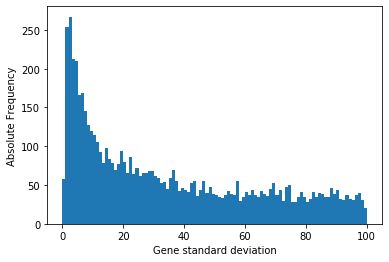

In [18]:
plt.hist(std_hist, bins=100, range=(0,100))
plt.xlabel('Gene standard deviation')
plt.ylabel('Absolute Frequency')
plt.show()

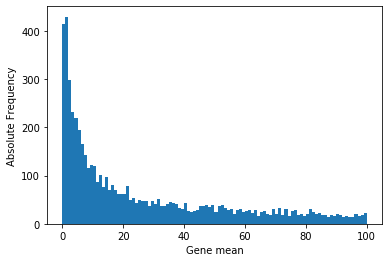

In [19]:
plt.hist(mean_hist, bins=100, range = (0,100))
plt.xlabel('Gene mean')
plt.ylabel('Absolute Frequency')
plt.show()

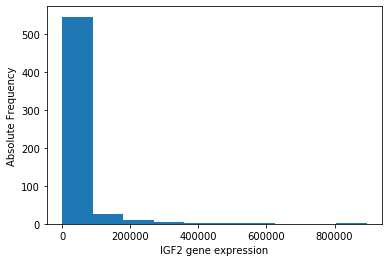

In [20]:
#IGF2 histogram
igf2_dist_hist = data_hugo_t_notna.loc[:,'IGF2']
plt.hist(igf2_dist_hist, bins = 10)
plt.xlabel('IGF2 gene expression')
plt.ylabel('Absolute Frequency')
#plt.title(r'Histogram of variances')
plt.show()

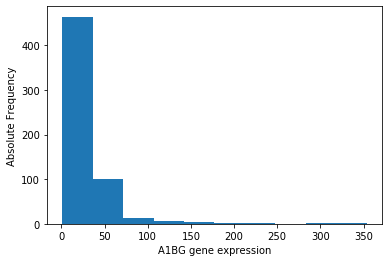

In [21]:
#COL1A1 histogram
a1bg_dist_hist = data_hugo_t_notna.loc[:,'A1BG']
plt.hist(a1bg_dist_hist, bins = 10)
plt.xlabel('A1BG gene expression')
plt.ylabel('Absolute Frequency')
#plt.title(r'Histogram of variances')
plt.show()

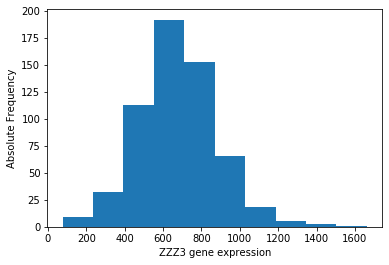

In [22]:
#ZZZ3 histogram
zzz3_dist_hist = data_hugo_t_notna.loc[:,'ZZZ3']
plt.hist(zzz3_dist_hist, bins = 10)
plt.xlabel('ZZZ3 gene expression')
plt.ylabel('Absolute Frequency')
#plt.title(r'Histogram of variances')
plt.show()

Na parte de processamento dos dados, poder-se-ia ter optado por usar as bibliotecas existentes para o realizar. No entanto, optou-se por fazer este processo de forma mais detalhada de forma a que este possa ser mais personalizado.  

##### Flat Patterns Filter

Como já foi dito, pretende-se descobrir os genes que consigam caraterizar estas doenças. Para isso é necessário verificar quais é que apresentam uma maior variabilidade. Sendo, assim, um dos primeiros passos é remover os genes que apresentem média e desvio padrão baixos.

In [23]:
data_hugo_describe_t = data_hugo_t_notna.describe().transpose()
display(data_hugo_describe_t.head())

,count,mean,std,min,25%,50%,75%,max
Hugo_Symbol,,,,,,,,
A1BG,592.0,29.156205,31.205854,0.932293,13.428944,21.515400,34.219104,353.655545
A1CF,592.0,171.983638,104.409737,0.000000,100.183902,164.979500,230.668250,709.526000
A2BP1,592.0,7.785338,20.979311,-0.330564,0.000000,1.496400,5.311897,178.780109
A2LD1,592.0,175.663194,77.676624,16.696357,122.756250,163.949500,214.592805,595.574182
A2M,592.0,5687.023927,4757.121819,162.329239,2971.608803,4331.566234,6787.933946,45920.300000


In [24]:
#create a list to save the genes with mean and std values above 20
genes_list = data_hugo_describe_t[(data_hugo_describe_t['std'] > 20) & (data_hugo_describe_t['mean'] > 20)].index.to_list() 
#filter with genes_list
data_hugo_t_notna_fpf = data_hugo_t_notna.loc[:,genes_list]
dht_fpf = data_hugo_t_notna_fpf.describe()
display(dht_fpf.sort_values('std', axis = 1, ascending=True))

Hugo_Symbol,SPDYE6,TSSK6,C9orf93,ZNF717,TRIM46,SEMA5B,TMPPE,DNAH17,C1orf213,BEST1,...,REG1A,MUC2,ACTB,COL3A1,PIGR,ADAM6,CEACAM5,OLFM4,COL1A1,IGF2
count,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,...,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000
mean,26.546147,33.397858,36.939436,38.910731,20.055744,27.991922,44.695887,27.616132,30.361435,26.801045,...,9734.297660,21030.513181,114217.067097,37219.222543,54926.042661,34850.983316,114355.438976,38827.733250,54371.333329,20491.325915
std,20.065068,20.067464,20.076338,20.080427,20.085088,20.100611,20.106519,20.112321,20.117032,20.207970,...,45037.884778,47134.908516,49847.479482,50046.947863,56722.936473,60646.240368,65290.381879,72881.803404,73082.792061,74759.830646
min,-0.686253,0.048011,-0.067759,-0.247598,0.000000,0.166067,0.000779,1.258154,0.032503,-0.164816,...,-0.296803,0.798600,43676.554490,76.147902,0.798600,59.410900,478.970360,1.929900,888.040000,19.734000
25%,14.197300,20.504329,23.423211,25.235412,8.907857,14.014725,31.165525,15.639325,17.467350,14.546575,...,45.793675,718.279500,86561.892983,12110.068810,7472.615000,4789.855000,68164.775000,1687.425667,15923.313840,234.874750
50%,21.829794,29.526670,32.817746,36.824290,15.250152,22.555450,41.240352,21.887150,26.396050,21.908817,...,417.965743,5675.600000,103750.995750,22873.050000,38285.245860,15524.518715,106469.182400,10512.466495,29493.014485,472.876527
75%,33.843450,41.383900,46.573500,51.185625,24.385833,38.288885,55.710200,33.242896,38.906600,33.257804,...,3045.067500,20462.725000,125728.750000,41870.225000,84808.169775,37458.650000,153749.039700,41846.308160,60956.600000,1403.157500
max,157.583239,142.614668,132.032000,157.095000,208.853918,158.100000,152.304000,191.500000,215.517000,176.477000,...,824037.000000,698411.000000,565767.095700,583660.000000,324843.000000,847320.659800,458395.000000,681410.000000,778070.000000,894409.000000


##### Logarithmic Transformations

In [25]:
print('Minimum value after apply Flat pattern Filter: ',np.min(np.min(data_hugo_t_notna_fpf.values)))
data_hugo_t_notna_fpf_log = np.log2(data_hugo_t_notna_fpf+1) #we add 1 because the minimum value of this dataframe is -0.964...this is to avoid values out of the log domain
display(data_hugo_t_notna_fpf_log.head())

Minimum value after apply Flat pattern Filter:  -0.96417865


Hugo_Symbol,A1BG,A1CF,A2LD1,A2M,A4GALT,AAAS,AACS,AADAT,AAGAB,AAK1,...,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3
TCGA-3L-AA1B-01,4.532753,7.794331,7.479036,13.957873,6.906362,9.832165,10.249291,8.012641,10.404045,9.554526,...,8.921969,8.660499,9.300568,6.171591,8.852732,10.111683,9.087561,12.611991,10.408669,9.642694
TCGA-4N-A93T-01,7.428511,6.667168,8.540570,10.546248,4.539438,9.786196,9.851113,6.611152,9.230988,8.992842,...,8.630300,7.552177,8.791772,5.345929,8.522444,10.168033,8.188638,12.184293,10.254001,8.387229
TCGA-4T-AA8H-01,4.459300,7.451277,8.212740,10.382159,4.094641,9.968537,10.499746,7.292138,10.073097,8.763408,...,8.647196,9.027303,10.014132,5.019635,8.453184,10.082854,9.389552,12.123349,11.552194,9.052753
TCGA-5M-AAT4-01,2.898924,7.252315,7.005434,11.243924,6.261747,10.046851,10.198249,7.316037,9.957894,9.628349,...,9.230808,8.874699,10.670736,5.798237,9.085257,10.425583,8.802041,12.033144,10.095885,9.168524
TCGA-5M-AAT5-01,3.985355,8.004024,6.740671,11.228422,5.411002,10.172977,9.757530,8.458124,10.690443,9.558040,...,9.095537,9.376197,9.714012,4.915626,8.745960,10.278426,9.107228,11.921566,9.990714,8.693494


In [26]:
print('Minimum value after log transformation: ', np.min(np.min(data_hugo_t_notna_fpf_log.values)))
print('Maximum value after log transformation: ', np.max(np.max(data_hugo_t_notna_fpf_log.values)))

Minimum value after log transformation:  -4.803036480546765
Maximum value after log transformation:  19.770576792839023


##### Data Normalization (Standardization - Z Normalization)

Em relação ao processo de normalização, decidiu-se implementar este com base na média e no desvio padrão. Assim, todas os genes ficam com média próxima de zero e desvio padrão unitário.

In [27]:
#dataframe normalization; z normalization sets the mean of data to 0 and the standard deviation to 1
data_hugo_normalized = (data_hugo_t_notna_fpf_log-data_hugo_t_notna_fpf_log.mean())/data_hugo_t_notna_fpf_log.std()

In [28]:
print('Minimum value after normalization: ', np.min(np.min(data_hugo_normalized.values)))
print('Maximum value after normalization: ', np.max(np.max(data_hugo_normalized.values)))
data_hugo_normalized.describe()


Minimum value after normalization:  -17.33576683684955
Maximum value after normalization:  11.712575907627418


Hugo_Symbol,A1BG,A1CF,A2LD1,A2M,A4GALT,AAAS,AACS,AADAT,AAGAB,AAK1,...,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3
count,5.920000e+02,5.920000e+02,5.920000e+02,5.920000e+02,5.920000e+02,5.920000e+02,5.920000e+02,5.920000e+02,5.920000e+02,5.920000e+02,...,5.920000e+02,5.920000e+02,5.920000e+02,5.920000e+02,5.920000e+02,5.920000e+02,5.920000e+02,5.920000e+02,5.920000e+02,5.920000e+02
mean,7.733819e-16,-1.489049e-15,-2.823473e-15,-7.700109e-15,2.494626e-15,-2.397604e-14,-5.743529e-15,-8.117943e-15,2.300712e-15,1.581693e-15,...,-2.099194e-14,7.709299e-15,-2.305588e-15,-5.839923e-16,-1.754602e-15,-6.909075e-15,-1.858752e-14,-1.258958e-15,-9.275613e-15,-1.275519e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.419917e+00,-4.962684e+00,-4.911191e+00,-4.727816e+00,-3.077405e+00,-4.460365e+00,-3.327560e+00,-4.529285e+00,-7.000821e+00,-4.156474e+00,...,-1.468054e+01,-6.091508e+00,-3.795541e+00,-8.126858e+00,-5.993534e+00,-4.970601e+00,-6.632974e+00,-6.824489e+00,-4.195767e+00,-6.230070e+00
25%,-6.309859e-01,-2.516057e-01,-5.810894e-01,-5.745145e-01,-6.540486e-01,-6.015835e-01,-6.007149e-01,-5.557660e-01,-3.920681e-01,-5.404003e-01,...,-3.258668e-01,-5.369730e-01,-5.693773e-01,-4.866093e-01,-5.238262e-01,-6.190657e-01,-4.145183e-01,-5.527966e-01,-5.863237e-01,-4.848548e-01
50%,-1.375011e-02,2.534025e-01,5.858953e-02,-3.525527e-02,1.351971e-02,-6.346969e-02,-6.236012e-03,1.608783e-01,1.113704e-01,-2.693701e-02,...,8.981383e-02,8.464644e-02,8.625970e-02,1.474210e-01,4.027782e-02,5.476672e-03,9.411188e-02,-5.551199e-02,5.629950e-02,1.117381e-01
75%,6.068383e-01,5.936520e-01,6.546920e-01,6.076699e-01,6.046126e-01,6.174540e-01,6.499376e-01,6.668959e-01,5.704513e-01,5.263121e-01,...,5.129428e-01,6.377290e-01,6.503797e-01,6.480927e-01,6.533469e-01,6.344817e-01,5.757441e-01,6.026147e-01,6.141277e-01,6.467677e-01
max,3.810587e+00,1.737203e+00,2.920674e+00,3.344115e+00,3.800577e+00,2.794379e+00,2.722896e+00,3.315724e+00,2.443715e+00,3.496416e+00,...,1.788908e+00,3.197664e+00,2.536009e+00,2.355950e+00,3.159383e+00,2.932257e+00,2.432084e+00,3.102173e+00,3.286428e+00,2.772509e+00


### Metadados

In [29]:
meta_crc= pd.read_csv("coadread_tcga_pan_can_atlas_2018_clinical_data.tsv", sep="\t")
del meta_crc["Study ID"]

In [30]:
meta_crc.head()

,Patient ID,Sample ID,Diagnosis Age,Neoplasm Disease Stage American Joint Committee on Cancer Code,American Joint Committee on Cancer Publication Version Type,Aneuploidy Score,Buffa Hypoxia Score,Cancer Type,TCGA PanCanAtlas Cancer Type Acronym,Cancer Type Detailed,...,9p Status,9q Status,Subtype,Tissue Prospective Collection Indicator,Tissue Retrospective Collection Indicator,Tissue Source Site,Tumor Disease Anatomic Site,Tumor Type,Patient Weight,Winter Hypoxia Score
0,TCGA-3L-AA1B,TCGA-3L-AA1B-01,61.0,STAGE I,7TH,19.0,5.0,Colorectal Adenocarcinoma,COAD,Colon Adenocarcinoma,...,Not Called,Not Called,COAD_CIN,Yes,No,3L,Colon,Colon Adenocarcinoma,63.300,-12.0
1,TCGA-4N-A93T,TCGA-4N-A93T-01,67.0,STAGE IIIB,7TH,13.0,-15.0,Colorectal Adenocarcinoma,COAD,Colon Adenocarcinoma,...,Not Called,Not Called,COAD_CIN,Yes,No,4N,Colon,Colon Adenocarcinoma,134.000,-6.0
2,TCGA-4T-AA8H,TCGA-4T-AA8H-01,42.0,STAGE IIA,7TH,18.0,15.0,Colorectal Adenocarcinoma,COAD,Mucinous Adenocarcinoma of the Colon and Rectum,...,Not Called,Not Called,COAD_CIN,No,Yes,4T,Colon,"Colon Adenocarcinoma, Mucinous Type",107.956,-4.0
3,TCGA-5M-AAT4,TCGA-5M-AAT4-01,74.0,STAGE IV,6TH,18.0,35.0,Colorectal Adenocarcinoma,COAD,Colon Adenocarcinoma,...,Gained,Not Called,COAD_CIN,No,Yes,5M,Colon,Colon Adenocarcinoma,NaN,32.0
4,TCGA-5M-AAT5,TCGA-5M-AAT5-01,NaN,NaN,NaN,10.0,33.0,Colorectal Adenocarcinoma,COAD,Colon Adenocarcinoma,...,Not Called,Not Called,COAD_CIN,NaN,NaN,5M,NaN,Colon Adenocarcinoma,NaN,18.0


De modo a se relacionar os dataframes das features e dos metadados, decidiu-se definir o Sample ID como indíce do dataframe dos metadados. 

In [31]:
meta_crc = meta_crc.set_index("Sample ID")

In [32]:
meta_crc.head()

,Patient ID,Diagnosis Age,Neoplasm Disease Stage American Joint Committee on Cancer Code,American Joint Committee on Cancer Publication Version Type,Aneuploidy Score,Buffa Hypoxia Score,Cancer Type,TCGA PanCanAtlas Cancer Type Acronym,Cancer Type Detailed,Center of sequencing,...,9p Status,9q Status,Subtype,Tissue Prospective Collection Indicator,Tissue Retrospective Collection Indicator,Tissue Source Site,Tumor Disease Anatomic Site,Tumor Type,Patient Weight,Winter Hypoxia Score
Sample ID,,,,,,,,,,,,,,,,,,,,,
TCGA-3L-AA1B-01,TCGA-3L-AA1B,61.0,STAGE I,7TH,19.0,5.0,Colorectal Adenocarcinoma,COAD,Colon Adenocarcinoma,Albert Einstein Medical Center,...,Not Called,Not Called,COAD_CIN,Yes,No,3L,Colon,Colon Adenocarcinoma,63.300,-12.0
TCGA-4N-A93T-01,TCGA-4N-A93T,67.0,STAGE IIIB,7TH,13.0,-15.0,Colorectal Adenocarcinoma,COAD,Colon Adenocarcinoma,Mary Bird Perkins Cancer Center - Our Lady of ...,...,Not Called,Not Called,COAD_CIN,Yes,No,4N,Colon,Colon Adenocarcinoma,134.000,-6.0
TCGA-4T-AA8H-01,TCGA-4T-AA8H,42.0,STAGE IIA,7TH,18.0,15.0,Colorectal Adenocarcinoma,COAD,Mucinous Adenocarcinoma of the Colon and Rectum,Duke University,...,Not Called,Not Called,COAD_CIN,No,Yes,4T,Colon,"Colon Adenocarcinoma, Mucinous Type",107.956,-4.0
TCGA-5M-AAT4-01,TCGA-5M-AAT4,74.0,STAGE IV,6TH,18.0,35.0,Colorectal Adenocarcinoma,COAD,Colon Adenocarcinoma,University of Sao Paulo,...,Gained,Not Called,COAD_CIN,No,Yes,5M,Colon,Colon Adenocarcinoma,NaN,32.0
TCGA-5M-AAT5-01,TCGA-5M-AAT5,NaN,NaN,NaN,10.0,33.0,Colorectal Adenocarcinoma,COAD,Colon Adenocarcinoma,University of Sao Paulo,...,Not Called,Not Called,COAD_CIN,NaN,NaN,5M,NaN,Colon Adenocarcinoma,NaN,18.0


In [33]:
meta_crc.shape

(592, 94)

Pode-se ver que este dataframe contém 94 labels. 
Para ver que labels é que estão presentes, guardou-se o nome das colunas numa lista: col_meta_crc

In [34]:
col_meta_crc = list(meta_crc.columns) #save all data frame columns in a list
display(col_meta_crc)

['Patient ID',
 'Diagnosis Age',
 'Neoplasm Disease Stage American Joint Committee on Cancer Code',
 'American Joint Committee on Cancer Publication Version Type',
 'Aneuploidy Score',
 'Buffa Hypoxia Score',
 'Cancer Type',
 'TCGA PanCanAtlas Cancer Type Acronym',
 'Cancer Type Detailed',
 'Center of sequencing',
 'Last Communication Contact from Initial Pathologic Diagnosis Date',
 'Birth from Initial Pathologic Diagnosis Date',
 'Last Alive Less Initial Pathologic Diagnosis Date Calculated Day Value',
 'Disease Free (Months)',
 'Disease Free Status',
 'Months of disease-specific survival',
 'Disease-specific Survival status',
 'Ethnicity Category',
 'Form completion date',
 'Fraction Genome Altered',
 'Neoplasm Histologic Grade',
 'Neoadjuvant Therapy Type Administered Prior To Resection Text',
 'ICD-10 Classification',
 'International Classification of Diseases for Oncology, Third Edition ICD-O-3 Histology Code',
 'International Classification of Diseases for Oncology, Third Editio

As labels só são úteis se não tiverem, ou tiverem poucos missing values. Assim, procedeu-se à contagem de missing values para cada label.

In [35]:
meta_null_val = meta_crc.iloc[:,:].isnull().sum()
meta_null_val.to_dict()


{'Patient ID': 0,
 'Diagnosis Age': 2,
 'Neoplasm Disease Stage American Joint Committee on Cancer Code': 14,
 'American Joint Committee on Cancer Publication Version Type': 69,
 'Aneuploidy Score': 8,
 'Buffa Hypoxia Score': 227,
 'Cancer Type': 0,
 'TCGA PanCanAtlas Cancer Type Acronym': 0,
 'Cancer Type Detailed': 0,
 'Center of sequencing': 0,
 'Last Communication Contact from Initial Pathologic Diagnosis Date': 50,
 'Birth from Initial Pathologic Diagnosis Date': 4,
 'Last Alive Less Initial Pathologic Diagnosis Date Calculated Day Value': 2,
 'Disease Free (Months)': 370,
 'Disease Free Status': 370,
 'Months of disease-specific survival': 4,
 'Disease-specific Survival status': 24,
 'Ethnicity Category': 245,
 'Form completion date': 2,
 'Fraction Genome Altered': 11,
 'Neoplasm Histologic Grade': 592,
 'Neoadjuvant Therapy Type Administered Prior To Resection Text': 2,
 'ICD-10 Classification': 3,
 'International Classification of Diseases for Oncology, Third Edition ICD-O-3 Hi

Na próxima célula pretende-se verificar se os indíviduos presentes nos metadados são os mesmos dos presentes no dataframe das features.
Como o resultado da soma é 592, então exitem 592 indíviduos que compartilham os dataframes das features e das labels. Como o número total de indivíduos neste dataset é de 592, então todos os indíviduos do dataframe das features têm pelo menos uma label associada. 

In [36]:
print('Número de indivíduos que compartilham o dataframe das features e dos metadados:',(meta_crc.index.sort_values() == data_hugo.columns.sort_values()).sum())

Número de indivíduos que compartilham o dataframe das features e dos metadados: 592


De seguida, realizou-se uma contagem das pessoas associadas a cada tipo de cancro (associadas a cada valor da label 'Cancer Type Detailed').

In [37]:
#types of cancer type detailed
crc_types = list(meta_crc.iloc[:,8])
#display(crc_types)

#non-repeating array
crc_types_nr = list(nrepeat_array(crc_types))
#display(crc_types_nr)

#count number of each case (detailed)
for i in crc_types_nr:
    print(i,':', crc_types.count(i))


Colon Adenocarcinoma : 377
Mucinous Adenocarcinoma of the Colon and Rectum : 61
Rectal Adenocarcinoma : 154


Em relação ao tipo de tumor, pode-se ver que existem labels com pouca representação, como é o caso do Rectum Adenocarcinoma. Assim, uma análise desta label comparativamente com a anterior, não seria útil, porque esta apreseta-se muito desbalanceada.

In [38]:
#tumor types
tumor_types = list(meta_crc.iloc[:,91])
#display(crc_types)

#non-repeating array
tumor_types_nr = list(nrepeat_array(tumor_types))
#display(crc_types_nr)

#count number of each case (detailed)
for i in tumor_types_nr:
    print(i,':', tumor_types.count(i))

Colon Adenocarcinoma : 377
Colon Adenocarcinoma, Mucinous Type : 61
Rectal Adenocarcinoma : 135
Rectum Adenocarcinoma : 6
Rectal Adenocarcinoma, Mucinous Type : 13


Na parte seguinte, fez-se uma análise univariada da label: 'Aneuploidy Score'.

count    584.000000
mean      12.299658
std        8.140128
min        0.000000
25%        6.000000
50%       12.000000
75%       19.000000
max       31.000000
Name: Aneuploidy Score, dtype: float64

c:\Users\Utilizador\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\Users\Utilizador\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


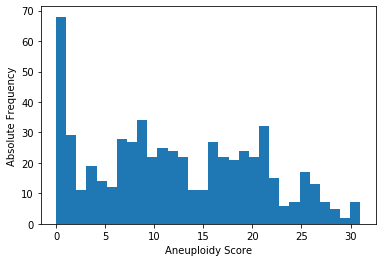

In [39]:
display(meta_crc.loc[:,'Aneuploidy Score'].describe())

#Aneuploidy Score histogram
aneuploidy_score = meta_crc.loc[:,'Aneuploidy Score']
plt.hist(aneuploidy_score, bins = 30)
plt.xlabel('Aneuploidy Score')
plt.ylabel('Absolute Frequency')
plt.show()

Em relação à label 'Diagnosis Age' decidiu-se realizar uma análise que permita estudar a existência ou não de uma relação entre a idade de diagnóstico e a respetiva doença. Para isto, agruparam-se os dados em 3 classes, correspondentes aos 3 tipos de cancro (cada label do 'Cancer Type Detailed'). Com este agrupamento, decidiu-se fazer uma análise gráfica multivariada (ou mais concretamente, bivariada).

<Figure size 720x720 with 0 Axes>

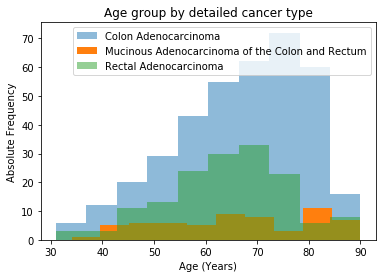

<Figure size 720x720 with 0 Axes>

In [40]:
meta_flt_ca = meta_crc.loc[meta_crc['Cancer Type Detailed'] == 'Colon Adenocarcinoma']
meta_flt_macr = meta_crc.loc[meta_crc['Cancer Type Detailed'] == 'Mucinous Adenocarcinoma of the Colon and Rectum']
meta_flt_ra = meta_crc.loc[meta_crc['Cancer Type Detailed'] == 'Rectal Adenocarcinoma']

plt.title('Age group by detailed cancer type')
plt.xlabel('Age (Years)')
plt.ylabel('Absolute Frequency')

plt.hist(meta_flt_ca['Diagnosis Age'], bins=10, alpha = 0.5)
plt.hist(meta_flt_macr['Diagnosis Age'], bins=10, alpha = 1)    
plt.hist(meta_flt_ra['Diagnosis Age'], bins = 10, alpha = 0.5)

plt.legend(['Colon Adenocarcinoma','Mucinous Adenocarcinoma of the Colon and Rectum','Rectal Adenocarcinoma'])
plt.figure(figsize = (10,10))


Com base no gráfico anterior, pode-se constatar que tanto o Adenocarcinoma do cólon, como o Adenocarcinoma do reto tem uma maior incidência em indivíduos com uma idade mais avançada. Já o Adenocarcinoma mucinoso do cólon e do reto apresenta uma incídência aproximadamente constante ao longo de toda a faixa etária estudada.

<Figure size 720x720 with 0 Axes>

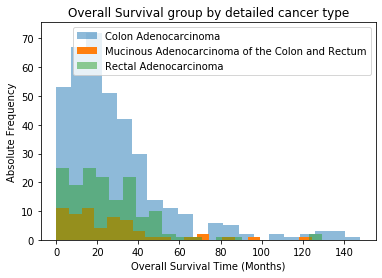

<Figure size 720x720 with 0 Axes>

In [41]:
plt.title('Overall Survival group by detailed cancer type')
plt.xlabel('Overall Survival Time (Months)')
plt.ylabel('Absolute Frequency')

plt.hist(meta_flt_ca['Overall Survival (Months)'], bins=20, alpha = 0.5)
plt.hist(meta_flt_macr['Overall Survival (Months)'], bins=20, alpha = 1)    
plt.hist(meta_flt_ra['Overall Survival (Months)'], bins = 20, alpha = 0.5)

plt.legend(['Colon Adenocarcinoma','Mucinous Adenocarcinoma of the Colon and Rectum','Rectal Adenocarcinoma'])
plt.figure(figsize = (10,10))

Em relação ao tempo total de sobrevivência em função do tipo de cancro, não se consegue encontrar diferenças de forma tão evidente.

Outra label que se decidiu estudar foi o estado/condição de sobrevivência em função do tipo de cancro. 

Primeiramente, fez-se uma recolha dos estados possíveis de serem encontrados. 

In [42]:
display(meta_crc.loc[:,'Overall Survival Status'].unique().tolist())

['LIVING', 'DECEASED', nan]

Como exitem valores omissos, decidiu-se fazer primeiro uma remoção destes.

De seguida representou-se, através de uma gráfico circular, o estado de sobrevivência para cada tipo de cancro.

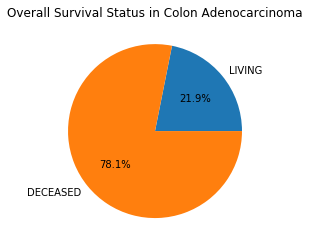

In [43]:
#meta_flt_ca.groupby('Overall Survival Status').size().plot.pie()
labels_nna = nrepeat_array(meta_flt_ca.loc[:,'Overall Survival Status'].dropna(axis = 0).values.tolist())
sizes = list(meta_flt_ca.groupby('Overall Survival Status').size())
plt.pie(sizes, labels = labels_nna, autopct = '%1.1f%%')
plt.title('Overall Survival Status in Colon Adenocarcinoma')
plt.show()

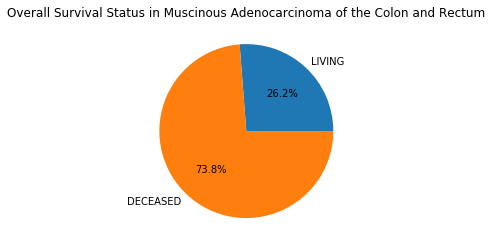

In [44]:
labels_nna = nrepeat_array(meta_flt_macr.loc[:,'Overall Survival Status'].dropna(axis = 0).values.tolist())
sizes = list(meta_flt_macr.groupby('Overall Survival Status').size())
plt.pie(sizes, labels = labels_nna, autopct = '%1.1f%%')
plt.title('Overall Survival Status in Muscinous Adenocarcinoma of the Colon and Rectum')
plt.show()

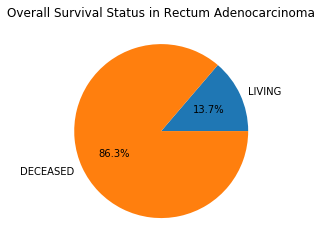

In [45]:
labels_nna = nrepeat_array(meta_flt_ra.loc[:,'Overall Survival Status'].dropna(axis = 0).values.tolist())
sizes = list(meta_flt_ra.groupby('Overall Survival Status').size())
plt.pie(sizes, labels = labels_nna, autopct = '%1.1f%%')
plt.title('Overall Survival Status in Rectum Adenocarcinoma')
plt.show()

Para o 'Aneuploidy Score' voltou-se a fazer uma análise, mas desta vez bivariada. Ou seja, pretendeu-se ver como o Aneuploidy Score varia consoante o tipo de cancro.

Pode-se ver que de uma forma geral, o Adenocarcinoma Retal apresenta valores mais elevados de pontuação de aneuploidia. Já em relação aos outros tipos de cancro, obtemos aproximadamente o mesmo tipo de distribuição.

<Figure size 720x720 with 0 Axes>

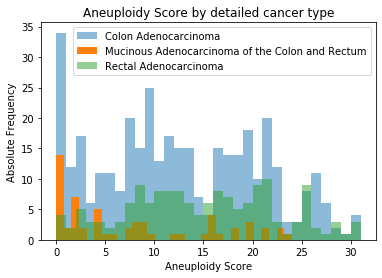

<Figure size 720x720 with 0 Axes>

In [46]:
plt.title('Aneuploidy Score by detailed cancer type')
plt.xlabel('Aneuploidy Score')
plt.ylabel('Absolute Frequency')

plt.hist(meta_flt_ca['Aneuploidy Score'], bins=31, alpha = 0.5)
plt.hist(meta_flt_macr['Aneuploidy Score'], bins=31, alpha = 1)    
plt.hist(meta_flt_ra['Aneuploidy Score'], bins = 31, alpha = 0.5)

plt.legend(['Colon Adenocarcinoma','Mucinous Adenocarcinoma of the Colon and Rectum','Rectal Adenocarcinoma'])
plt.figure(figsize = (10,10))

Em relação à fração do genoma alterado, pode-se voltar a concluir que o adenocarcinoma retal apresenta uma maior fração alterada do genoma comparativamente com os restantes tipos de cancro. Isto faz-nos supor que este tipo de cancro seja mais facilmente identificável através da expressão genómica, do que os restantes tipos de cancro.

count    581.000000
mean       0.246694
std        0.172239
min        0.000000
25%        0.112700
50%        0.238000
75%        0.352500
max        0.965300
Name: Fraction Genome Altered, dtype: float64

<Figure size 720x720 with 0 Axes>

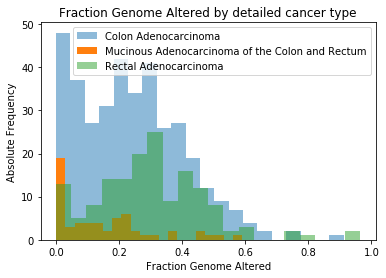

<Figure size 720x720 with 0 Axes>

In [47]:
display(meta_crc.loc[:,'Fraction Genome Altered'].describe())

plt.title('Fraction Genome Altered by detailed cancer type')
plt.xlabel('Fraction Genome Altered')
plt.ylabel('Absolute Frequency')

plt.hist(meta_flt_ca['Fraction Genome Altered'], bins=20, alpha = 0.5)
plt.hist(meta_flt_macr['Fraction Genome Altered'], bins=20, alpha = 1)    
plt.hist(meta_flt_ra['Fraction Genome Altered'], bins = 20, alpha = 0.5)

plt.legend(['Colon Adenocarcinoma','Mucinous Adenocarcinoma of the Colon and Rectum','Rectal Adenocarcinoma'])
plt.figure(figsize = (10,10))

Sobre o número de mutações encontrado em função do tipo de cancro, pode-se verificar que o Adenocarcinoma mucinoso do cólon e do reto apresenta, em média, um maior número de mutações presente. 

Mutation Count mean group by Colon Adenocarcinoma: 357.14071856287427
Mutation Count mean group by Muscinous Adenocarcinoma of the Colon and Rectum: 826.5714285714286
Mutation Count mean group by Rectal Adenocarcinoma: 318.3382352941176
--------------------------------------------------


<Figure size 720x720 with 0 Axes>

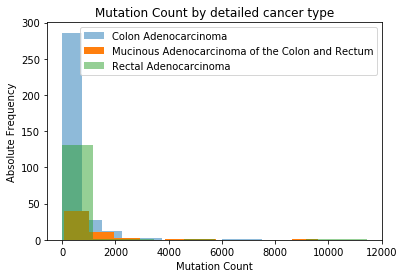

<Figure size 720x720 with 0 Axes>

In [48]:
print('Mutation Count mean group by Colon Adenocarcinoma:',meta_flt_ca['Mutation Count'].mean())
print('Mutation Count mean group by Muscinous Adenocarcinoma of the Colon and Rectum:',meta_flt_macr['Mutation Count'].mean())
print('Mutation Count mean group by Rectal Adenocarcinoma:',meta_flt_ra['Mutation Count'].mean())

print(50*'-')

plt.title('Mutation Count by detailed cancer type')
plt.xlabel('Mutation Count')
plt.ylabel('Absolute Frequency')

plt.hist(meta_flt_ca['Mutation Count'], bins=10, alpha = 0.5)
plt.hist(meta_flt_macr['Mutation Count'], bins=10, alpha = 1)    
plt.hist(meta_flt_ra['Mutation Count'], bins = 10, alpha = 0.5)

plt.legend(['Colon Adenocarcinoma','Mucinous Adenocarcinoma of the Colon and Rectum','Rectal Adenocarcinoma'])
plt.figure(figsize = (10,10))

<Figure size 720x720 with 0 Axes>

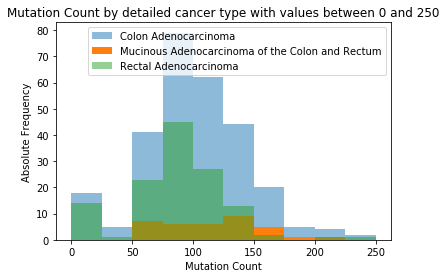

<Figure size 720x720 with 0 Axes>

In [49]:
plt.title('Mutation Count by detailed cancer type with values between 0 and 250')
plt.xlabel('Mutation Count')
plt.ylabel('Absolute Frequency')

plt.hist(meta_flt_ca['Mutation Count'], bins=10, alpha = 0.5, range=(0,250))
plt.hist(meta_flt_macr['Mutation Count'], bins=10, alpha = 1, range=(0,250))    
plt.hist(meta_flt_ra['Mutation Count'], bins = 10, alpha = 0.5, range=(0,250))

plt.legend(['Colon Adenocarcinoma','Mucinous Adenocarcinoma of the Colon and Rectum','Rectal Adenocarcinoma'])
plt.figure(figsize = (10,10))

In [50]:
#tissue source type - types
tissuesourcetype_types = list(meta_crc.iloc[:,89])
#display(tissuesourcetype_types)

#non-repeating array
tissuesourcetype_types_nr = list(nrepeat_array(tissuesourcetype_types))
#display(tissuesourcetype_types_nr)

#count number of each case
for i in tissuesourcetype_types_nr:
    print(i,':', tissuesourcetype_types.count(i))

3L : 1
4N : 1
4T : 1
5M : 5
A6 : 51
AA : 157
AD : 13
AF : 15
AG : 71
AH : 6
AM : 2
AU : 2
AY : 10
AZ : 19
CA : 10
CI : 6
CK : 14
CL : 3
CM : 37
D5 : 31
DC : 13
DM : 25
DT : 1
DY : 7
EF : 2
EI : 17
F4 : 16
F5 : 12
G4 : 24
G5 : 1
NH : 9
QG : 5
QL : 1
RU : 1
SS : 1
T9 : 1
WS : 1


In [51]:
#mutation_count
mutation_count = list(meta_crc.iloc[:,27])
#display(mutation_count)

display(meta_crc['Mutation Count'].head())

Sample ID
TCGA-3L-AA1B-01    120.0
TCGA-4N-A93T-01     87.0
TCGA-4T-AA8H-01    121.0
TCGA-5M-AAT4-01    176.0
TCGA-5M-AAT5-01     79.0
Name: Mutation Count, dtype: float64

Posteriormente, escolheu-se estudar a administração de uma terapia neoadjuvante em função de cada tipo de cancro. Para isso, recorreu-se a gráficos de barras.

In [52]:
#Neoadjuvant therapy
display(meta_crc.loc[:,'Neoadjuvant Therapy Type Administered Prior To Resection Text'].unique().tolist())

['No', nan, 'Yes']

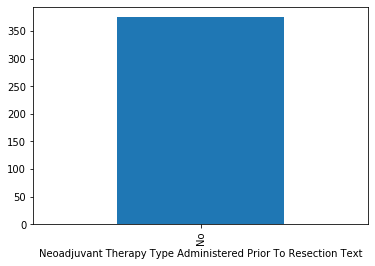

In [53]:
meta_flt_ca.groupby('Neoadjuvant Therapy Type Administered Prior To Resection Text').size().plot.bar()

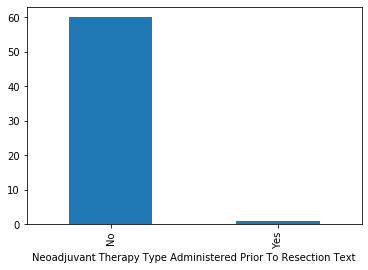

In [54]:
meta_flt_macr.groupby('Neoadjuvant Therapy Type Administered Prior To Resection Text').size().plot.bar()

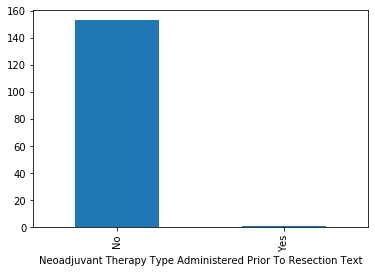

In [55]:
meta_flt_ra.groupby('Neoadjuvant Therapy Type Administered Prior To Resection Text').size().plot.bar()

A partir dos gráficos anteriores pode-se concluir que o número de terapias adjuvantes administradas é muito reduzido, sendo que estas foram apenas administradas a indivíduos com adenocarcinoma retal ou com adenocarcinoma mucinoso do cólon e do reto.

In [56]:
display(meta_crc['Months of disease-specific survival'].describe())
disease_spsurvival = list(meta_crc['Months of disease-specific survival'])
#display(disease_spsurvival)

display(meta_crc['Mutation Count'].describe())
disease_spsurvival = list(meta_crc['Mutation Count'])
#display(disease_spsurvival)
#for i in range(0,10): #de 0 até 9
#    for j in 


count    588.000000
mean      27.088157
std       24.498501
min        0.000000
25%       12.188908
50%       21.073742
75%       35.843443
max      148.009337
Name: Months of disease-specific survival, dtype: float64

count      526.000000
mean       397.085551
std       1063.979029
min          9.000000
25%         80.250000
50%        103.500000
75%        146.000000
max      11438.000000
Name: Mutation Count, dtype: float64

De modo a se fazer uma pequena análise sobre a influência dos genes com maior desvio padrão e os genes com menor desvio padrão criou-se um dataframe com este novo conjunto de genes (7 genes no total).

In [57]:
dht_describe_fpf = data_hugo_t_notna_fpf.describe()
dht_describe_fpf_sort = dht_describe_fpf.sort_values('std', axis= 1, ascending=False) #sort values

In [58]:
meta_cut1 = meta_crc.loc[:,['Diagnosis Age','Aneuploidy Score','Cancer Type Detailed','Fraction Genome Altered','Mutation Count','Overall Survival Status','Tumor Type']]
display(meta_cut1.head())

,Diagnosis Age,Aneuploidy Score,Cancer Type Detailed,Fraction Genome Altered,Mutation Count,Overall Survival Status,Tumor Type
Sample ID,,,,,,,
TCGA-3L-AA1B-01,61.0,19.0,Colon Adenocarcinoma,0.1127,120.0,LIVING,Colon Adenocarcinoma
TCGA-4N-A93T-01,67.0,13.0,Colon Adenocarcinoma,0.3130,87.0,LIVING,Colon Adenocarcinoma
TCGA-4T-AA8H-01,42.0,18.0,Mucinous Adenocarcinoma of the Colon and Rectum,0.2816,121.0,LIVING,"Colon Adenocarcinoma, Mucinous Type"
TCGA-5M-AAT4-01,74.0,18.0,Colon Adenocarcinoma,0.4095,176.0,DECEASED,Colon Adenocarcinoma
TCGA-5M-AAT5-01,NaN,10.0,Colon Adenocarcinoma,0.3435,79.0,NaN,Colon Adenocarcinoma


In [59]:
#five genes with highest std value
hlist = dht_describe_fpf_sort.columns[0:5].tolist()
#five genes with lowest std value
llist = dht_describe_fpf_sort.iloc[:,-2:].columns.tolist()
filtlist = hlist + llist #concatenate the two lists
data_hugo_cut1 = data_hugo_normalized.loc[:,filtlist]

display(data_hugo_cut1.head())


Hugo_Symbol,IGF2,COL1A1,OLFM4,CEACAM5,ADAM6,TSSK6,SPDYE6
TCGA-3L-AA1B-01,-0.181882,-0.561332,1.056477,-0.096287,0.838778,0.241380,1.760938
TCGA-4N-A93T-01,-0.786736,-1.934773,0.133793,0.644975,0.586740,0.703729,0.678148
TCGA-4T-AA8H-01,-0.616174,-1.796445,-0.142192,0.566982,0.293456,-0.964070,1.467142
TCGA-5M-AAT4-01,-0.585607,-0.631052,-1.420950,0.433223,-0.930864,0.276405,1.251432
TCGA-5M-AAT5-01,2.380386,-0.845392,0.740308,0.063220,-0.271071,0.424756,2.050857


In [60]:
#join the two cut dataframes
df_join1 = data_hugo_cut1.join(meta_cut1)
display(df_join1)

,IGF2,COL1A1,OLFM4,CEACAM5,ADAM6,TSSK6,SPDYE6,Diagnosis Age,Aneuploidy Score,Cancer Type Detailed,Fraction Genome Altered,Mutation Count,Overall Survival Status,Tumor Type
TCGA-3L-AA1B-01,-0.181882,-0.561332,1.056477,-0.096287,0.838778,0.241380,1.760938,61.0,19.0,Colon Adenocarcinoma,0.1127,120.0,LIVING,Colon Adenocarcinoma
TCGA-4N-A93T-01,-0.786736,-1.934773,0.133793,0.644975,0.586740,0.703729,0.678148,67.0,13.0,Colon Adenocarcinoma,0.3130,87.0,LIVING,Colon Adenocarcinoma
TCGA-4T-AA8H-01,-0.616174,-1.796445,-0.142192,0.566982,0.293456,-0.964070,1.467142,42.0,18.0,Mucinous Adenocarcinoma of the Colon and Rectum,0.2816,121.0,LIVING,"Colon Adenocarcinoma, Mucinous Type"
TCGA-5M-AAT4-01,-0.585607,-0.631052,-1.420950,0.433223,-0.930864,0.276405,1.251432,74.0,18.0,Colon Adenocarcinoma,0.4095,176.0,DECEASED,Colon Adenocarcinoma
TCGA-5M-AAT5-01,2.380386,-0.845392,0.740308,0.063220,-0.271071,0.424756,2.050857,NaN,10.0,Colon Adenocarcinoma,0.3435,79.0,NaN,Colon Adenocarcinoma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-AG-A026-01,-0.627640,-0.601746,0.529567,0.948344,-0.840660,1.578223,0.366189,66.0,19.0,Rectal Adenocarcinoma,0.4292,202.0,DECEASED,Rectal Adenocarcinoma
TCGA-AG-A02G-01,0.244384,-1.607916,0.548485,-1.303157,-0.685365,2.246920,0.097434,66.0,19.0,Rectal Adenocarcinoma,0.4973,NaN,DECEASED,Rectal Adenocarcinoma
TCGA-AG-A02N-01,0.082149,-1.617545,0.141080,0.177766,-0.226233,-0.860986,0.755613,67.0,4.0,Rectal Adenocarcinoma,0.0980,1081.0,LIVING,Rectal Adenocarcinoma
TCGA-AG-A02X-01,-1.176156,-1.083214,-0.464400,1.184670,-0.309125,1.075483,0.891674,77.0,18.0,Rectal Adenocarcinoma,0.9653,126.0,LIVING,Rectal Adenocarcinoma


Aqui, pode-se ver que o gene IGF2 se apresenta como o que tem maior desvio padrão. Isto vai de encontro com a literatura existente (https://www.ncbi.nlm.nih.gov/pubmed/22810696).

Depois de se ter obtido este novo dataframe(df_join1) procedeu-se a uma representação gráfica múltipla envolvendo todas as variáveis do dataframe df_join1, com exceção da label 'Cancer Type Detailed' que é usada para diferenciação dos grupos obtidos.

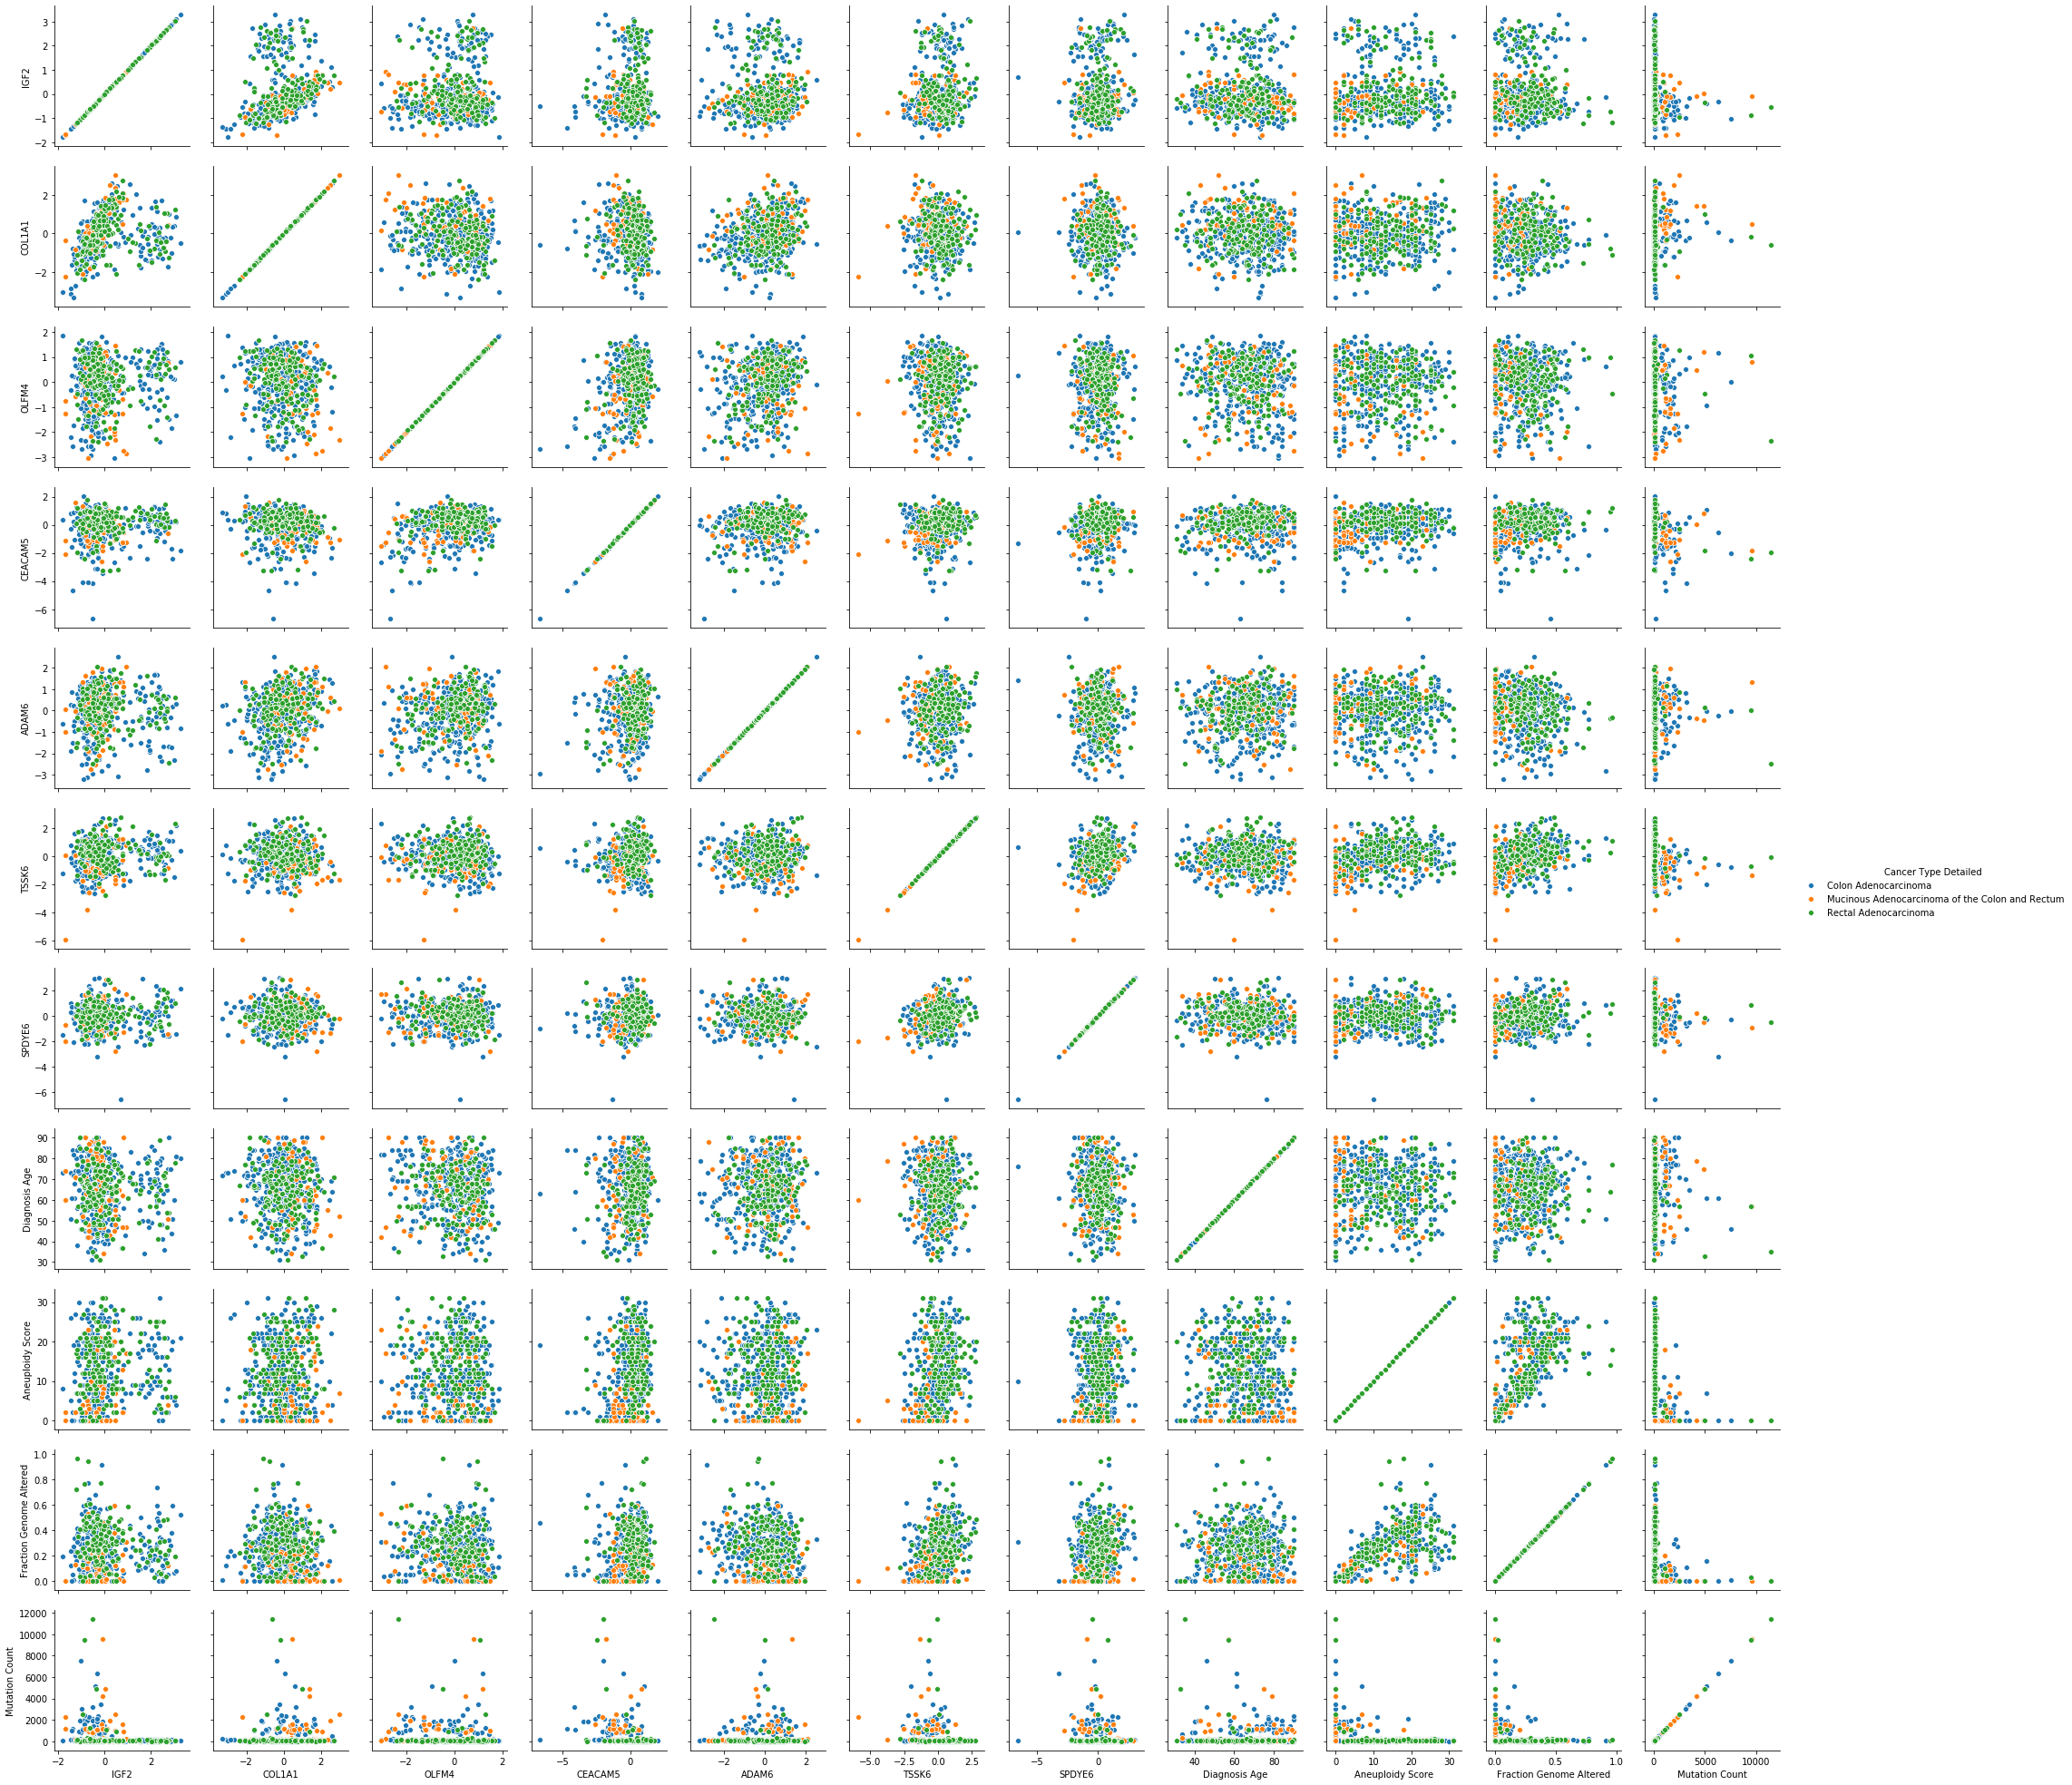

In [61]:
#plot of data using seaborn
g = sns.PairGrid(df_join1, hue = 'Cancer Type Detailed')
g.map(sns.scatterplot)
g.add_legend()

A partir destes múltiplos gráficos, apenas se conseguiu concluir que o número de mutações permite destinguir facilmente o adenocarcinoma do cólon dos outros dois tipos de cancro. Em relação às restantes categorias, não se conseguiu retirar nenhuma informação pertinente.

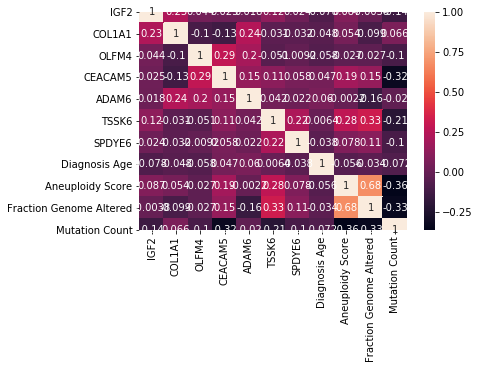

In [62]:
df_join2 = data_hugo_normalized.join(meta_cut1)
ax = sns.heatmap(df_join1.corr(), annot=True)

De igual modo, a matriz correlação também não permite tirar conclusões relevantes.
Visto que se quer correlacionar as variáveis numéricas com variáveis categóricas, então teve-se de se recorrer ao teste ANOVA para selecionar os genes com maior correlação com os diferentes tipos de cancro.

In [63]:
import scipy.stats as stats
import statistics

In [64]:
df_join2 = data_hugo_normalized.join(meta_cut1)
df_join3 = df_join2.drop(['Fraction Genome Altered','Diagnosis Age','Aneuploidy Score','Mutation Count','Overall Survival Status','Tumor Type'],axis=1)
df_join3 = df_join3.loc[:,~df_join3.columns.duplicated()] #remove duplicated columns

data_hugo_t_notna_fpf = data_hugo_t_notna_fpf.loc[:,~data_hugo_t_notna_fpf.columns.duplicated()]

In [65]:
ctg = df_join3.loc[:,'Cancer Type Detailed'].unique()

dic = {}
for i in data_hugo_t_notna_fpf.transpose().index:
    d_data = {grp:data_hugo_t_notna_fpf[i][df_join3.loc[:,'Cancer Type Detailed']== grp] for grp in ctg}
    dic[i] = d_data

Comparação entre o adenocarcinoma do cólon e o adenocarcinoma mucinoso do cólon e de reto

In [151]:
psup_ca_macr = []
flist_ca_macr = []
genes_ca_macr_list = []
for gene in data_hugo_normalized.transpose().index:
    fold = statistics.mean(dic[gene][ctg[1]])/statistics.mean(dic[gene][ctg[0]])
    fvalue, pvalue = stats.f_oneway(dic[gene][ctg[0]],dic[gene][ctg[1]])
    if pvalue > 0.00000000001:
        psup_ca_macr.append(gene)
    else:
        genes_ca_macr_list.append(gene)
        if fold < 1:
            flist_ca_macr.append((gene, fvalue, pvalue, "decrease"))
        else :
            flist_ca_macr.append((gene, fvalue, pvalue, "increase"))

print(len(genes_ca_macr_list))


37


In [153]:
flist_ca_macr_order=sorted(flist_ca_macr, key=lambda flist_gene: flist_gene[1], reverse=True)
n=0 
n1=0 
while n < 3 and n1<=len(flist_ca_macr):
    if flist_ca_macr_order[n1][3]=="decrease":
        print("Gene:",flist_ca_macr_order[n1][0],", F-value:",flist_ca_macr_order[n1][1],", P-value:",flist_ca_macr_order[n1][2],", Gene Expression:",flist_ca_macr_order[n1][3])
        n+=1
    n1+=1

Gene: ACSL5 , F-value: 55.317227258329034 , P-value: 5.493461798761162e-13 , Gene Expression: decrease
Gene: UQCC , F-value: 50.42166354498801 , P-value: 5.072212121199057e-12 , Gene Expression: decrease
Gene: DNAJA3 , F-value: 49.546703475664565 , P-value: 7.566992886142381e-12 , Gene Expression: decrease


In [154]:
n=0 
n1=0 
while n < 10 and n1<=len(flist_ca_macr):
    if flist_ca_macr_order[n1][3]=="increase":
        print("Gene:",flist_ca_macr_order[n1][0],", F-value:",flist_ca_macr_order[n1][1],", P-value:",flist_ca_macr_order[n1][2],", Gene Expression:",flist_ca_macr_order[n1][3])
        n+=1
    n1+=1

Gene: SPDEF , F-value: 97.89734449524272 , P-value: 5.8646828345741284e-21 , Gene Expression: increase
Gene: CKAP4 , F-value: 86.8906762774641 , P-value: 5.771711117783971e-19 , Gene Expression: increase
Gene: ARSB , F-value: 70.25436944246029 , P-value: 7.252783811741837e-16 , Gene Expression: increase
Gene: CREB3L1 , F-value: 68.73909089360431 , P-value: 1.4069011316036809e-15 , Gene Expression: increase
Gene: ZBTB7C , F-value: 67.94728714762508 , P-value: 1.9907138951015868e-15 , Gene Expression: increase
Gene: SLAIN1 , F-value: 67.70624058050302 , P-value: 2.2128480049129106e-15 , Gene Expression: increase
Gene: MAPRE2 , F-value: 65.34955066750618 , P-value: 6.243274364190628e-15 , Gene Expression: increase
Gene: CLEC5A , F-value: 64.19183719591463 , P-value: 1.0412601635014483e-14 , Gene Expression: increase
Gene: TOX , F-value: 61.25148627146556 , P-value: 3.8401787493538216e-14 , Gene Expression: increase
Gene: FAM177B , F-value: 60.94812050067979 , P-value: 4.39584804047453e-14

Comparação entre o adenocarcinoma do cólon e o adenocarcinoma do reto

In [176]:
psup_ca_ra = []
flist_ca_ra = []
genes_ca_ra_list = []
for gene in data_hugo_normalized.transpose().index:
    fold_ca_ra = statistics.mean(dic[gene][ctg[2]])/statistics.mean(dic[gene][ctg[0]])
    fvalue, pvalue = stats.f_oneway(dic[gene][ctg[0]],dic[gene][ctg[2]])
    if pvalue > 0.0000001:
        psup_ca_ra.append(gene)
    else:
        genes_ca_ra_list.append(gene)
        if fold_ca_ra < 1:
            flist_ca_ra.append((gene, fvalue, pvalue, "decrease"))
        else :
            flist_ca_ra.append((gene, fvalue, pvalue, "increase"))

print(len(genes_ca_ra_list))

5


Pode-se ver que o p-value médio encontrado é superior às outras distinções, o que nos leva a concluir que é muito mais dificil diferenciar as pessoas com adenocarcinoma do reto com as que têm adenocarcinoma do reto.

In [180]:
flist_ca_ra_order=sorted(flist_ca_ra, key=lambda flist_gene: flist_gene[1], reverse=True)
n=0 
n1=0 
while n < 0 and n1<=len(flist_ca_ra):
    if flist_ca_ra_order[n1][3]=="decrease":
        print("Gene:",flist_ca_ra_order[n1][0],", F-value:",flist_ca_ra_order[n1][1],", P-value:",flist_ca_ra_order[n1][2],", Gene Expression:",flist_ca_ra_order[n1][3])
        n+=1
    n1+=1

In [182]:
n=0 
n1=0 
while n < 5 and n1<=len(flist_ca_ra):
    if flist_ca_ra_order[n1][3]=="increase":
        print("Gene:",flist_ca_ra_order[n1][0],", F-value:",flist_ca_ra_order[n1][1],", P-value:",flist_ca_ra_order[n1][2],", Gene Expression:",flist_ca_ra_order[n1][3])
        n+=1
    n1+=1

Gene: HOXB13 , F-value: 112.92644211801401 , P-value: 4.872745228805362e-24 , Gene Expression: increase
Gene: ZNF530 , F-value: 33.67335389643188 , P-value: 1.1238182417982564e-08 , Gene Expression: increase
Gene: ZNF528 , F-value: 32.509364353716165 , P-value: 1.9740548012567887e-08 , Gene Expression: increase
Gene: ST6GALNAC6 , F-value: 31.365688647433764 , P-value: 3.439348645906671e-08 , Gene Expression: increase
Gene: ZNF347 , F-value: 30.55981604666517 , P-value: 5.0911571747133496e-08 , Gene Expression: increase


A partir deste grupo de genes pode-se ver que o gene HOXB13 difere bastante as pessoas que têm adenocarcinoma do cólon e das que têm adenocarcinoma do reto.

Comparação entre o adenocarcinoma do reto e o adenocarcinoma mucinoso do cólon e de reto

In [171]:
psup_ra_macr = []
flist_ra_macr = []
genes_ra_macr_list = []
for gene in data_hugo_normalized.transpose().index:
    fold_ra_macr = statistics.mean(dic[gene][ctg[2]])/statistics.mean(dic[gene][ctg[1]])
    fvalue, pvalue = stats.f_oneway(dic[gene][ctg[1]],dic[gene][ctg[2]])
    if pvalue > 0.000000000001:
        psup_ra_macr.append(gene)
    else:
        genes_ra_macr_list.append(gene)
        if fold_ra_macr < 1:
            flist_ra_macr.append((gene, fvalue, pvalue, "decrease"))
        else :
            flist_ra_macr.append((gene, fvalue, pvalue, "increase"))

print(len(genes_ra_macr_list))

23


In [173]:
flist_ra_macr_order=sorted(flist_ra_macr, key=lambda flist_gene: flist_gene[1], reverse=True)
n=0 
n1=0 
while n < 8 and n1<=len(flist_ra_macr):
    if flist_ra_macr_order[n1][3]=="decrease":
        print("Gene:",flist_ra_macr_order[n1][0],", F-value:",flist_ra_macr_order[n1][1],", P-value:",flist_ra_macr_order[n1][2],", Gene Expression:",flist_ra_macr_order[n1][3])
        n+=1
    n1+=1

Gene: MAPRE2 , F-value: 79.27297529425402 , P-value: 2.405683776382019e-16 , Gene Expression: decrease
Gene: MLPH , F-value: 70.96771055122271 , P-value: 5.392147936557893e-15 , Gene Expression: decrease
Gene: AGR2 , F-value: 68.4343831999696 , P-value: 1.4189800633416399e-14 , Gene Expression: decrease
Gene: TRIM7 , F-value: 64.68644141549383 , P-value: 6.04017731100621e-14 , Gene Expression: decrease
Gene: MBP , F-value: 61.1391576358496 , P-value: 2.425489804792133e-13 , Gene Expression: decrease
Gene: CKAP4 , F-value: 60.01648235799218 , P-value: 3.7810792464315296e-13 , Gene Expression: decrease
Gene: ZBTB7C , F-value: 59.642450720284586 , P-value: 4.3857409242368446e-13 , Gene Expression: decrease
Gene: CREB3L1 , F-value: 59.23726897769052 , P-value: 5.151605903652815e-13 , Gene Expression: decrease


In [174]:
n=0 
n1=0 
while n < 10 and n1<=len(flist_ra_macr):
    if flist_ra_macr_order[n1][3]=="increase":
        print("Gene:",flist_ra_macr_order[n1][0],", F-value:",flist_ra_macr_order[n1][1],", P-value:",flist_ra_macr_order[n1][2],", Gene Expression:",flist_ra_macr_order[n1][3])
        n+=1
    n1+=1

Gene: KIAA0406 , F-value: 85.51908649929706 , P-value: 2.464332295746013e-17 , Gene Expression: increase
Gene: UQCC , F-value: 75.90131996228803 , P-value: 8.406158667594401e-16 , Gene Expression: increase
Gene: POFUT1 , F-value: 73.77212654486101 , P-value: 1.8670534291440737e-15 , Gene Expression: increase
Gene: PLAGL2 , F-value: 71.70177654365821 , P-value: 4.080716356590942e-15 , Gene Expression: increase
Gene: MOCS3 , F-value: 67.79367673470577 , P-value: 1.815036776038134e-14 , Gene Expression: increase
Gene: TH1L , F-value: 66.0301126307879 , P-value: 3.5850329177149985e-14 , Gene Expression: increase
Gene: C20orf4 , F-value: 62.666407852661905 , P-value: 1.3299862025505878e-13 , Gene Expression: increase
Gene: TAF4 , F-value: 61.57548532976631 , P-value: 2.042155637389147e-13 , Gene Expression: increase
Gene: SNHG11 , F-value: 60.55985321601379 , P-value: 3.0492131243902393e-13 , Gene Expression: increase
Gene: TP53RK , F-value: 60.19427787865833 , P-value: 3.523899272524624e-1

In [183]:
genes_list_join = genes_ca_macr_list + genes_ca_ra_list + genes_ra_macr_list
print(len(genes_list_join))
df_new1_join_features = data_hugo_normalized[genes_list_join]
df_new1_join_features = df_new1_join_features.loc[:,~df_new1_join_features.columns.duplicated()] #remove duplicated columns
df_new1_join = df_new1_join_features.join(meta_crc.loc[:,'Cancer Type Detailed'])
display(df_new1_join_features)

65


Hugo_Symbol,ACSL5,AQP3,ARSB,C12orf23,CAPN9,CBFA2T3,CKAP4,CLEC5A,CREB3L1,DNAJA3,...,NCOA5,PLAGL2,POFUT1,PXMP4,SNHG11,TAF4,TH1L,TM9SF4,TP53RK,TRIM7
TCGA-3L-AA1B-01,1.099193,1.038091,0.946956,0.147805,0.299540,0.744852,0.454976,-0.324282,-0.069696,-0.667159,...,0.723941,0.415269,-0.026873,-0.732920,0.685519,0.455209,-0.581071,-0.305703,-0.325009,-0.576209
TCGA-4N-A93T-01,-0.138047,-1.466224,-2.922354,-0.681201,-1.376428,-1.147732,-0.617594,-2.962443,1.416376,-0.033861,...,0.573388,-0.550507,0.193783,0.333346,0.927776,0.709908,0.544174,0.724063,-0.752106,-0.082098
TCGA-4T-AA8H-01,0.418532,0.698523,-1.187202,-1.291216,1.209519,-0.202953,-0.368336,-1.808209,0.698823,-0.628773,...,-0.940094,-0.925160,-1.202572,-0.819374,-1.225147,-1.635877,-1.176980,-0.651836,-1.285934,0.242737
TCGA-5M-AAT4-01,0.395116,-1.414378,-1.343092,-1.328299,0.248253,-1.013925,-0.884482,-1.091216,-0.093968,0.267982,...,-0.024503,0.404675,0.514141,0.385675,0.033324,-0.225308,-0.524454,0.582849,0.046863,-0.343493
TCGA-5M-AAT5-01,-0.574272,-0.983871,-0.556053,-1.230487,-1.537400,0.039386,-0.331923,-2.194392,-1.065002,0.778500,...,-0.236175,0.659821,0.294933,0.857336,0.308712,1.082308,1.242057,1.275683,0.889112,-0.408241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-AG-A026-01,0.644799,-0.396786,-0.846147,-0.563906,-0.146754,0.128376,-1.032739,-1.178567,-1.453187,0.496243,...,1.376050,2.061419,1.425367,1.275846,1.250620,1.517969,1.482641,2.057538,1.567832,-0.899922
TCGA-AG-A02G-01,0.033371,-1.047471,-0.621730,0.811207,1.168784,-1.289019,-0.132739,-1.166773,0.473553,-2.662542,...,0.840470,2.191637,1.515305,1.376488,1.639400,0.851719,0.472349,1.855739,1.615807,-1.266453
TCGA-AG-A02N-01,-0.585823,0.889906,1.351652,1.514005,1.351103,1.252564,0.465705,-0.294742,1.303147,-2.139752,...,-0.219356,-0.357571,-0.962535,-0.578966,-0.562727,-1.352837,-0.290159,-1.026178,-0.522880,1.359808
TCGA-AG-A02X-01,-0.786643,2.877230,0.395931,0.536409,1.140060,2.287545,1.938158,-1.718019,1.807997,1.734414,...,0.086709,0.276348,-0.213597,-3.875234,1.039426,-0.424675,-0.685071,0.107831,-0.490545,0.942313


Visto que apenas se quer um conjunto de genes capaz de distinguir entre os diferentes tipos de cancro, então decidiu-se considerar para cada gene a seguinte hipótese nula:

H0 - média de cada tipo de cancro para o gene selecionado é igual;

H1 - existe pelo menos um tipo de cancro com média diferente para o gene selecionado;

Para este caso usou-se um pvalue = 1E-10. Assim, a hipótese nula é rejeitada se pvalue < 1E-10.

In [75]:
# for each gene
# H0 - mean of each cancer type is the same
# H1 - at least one cancer type have different mean
# we will use a p-value = 0.05; so if p-value < 1E-10 we reject null hypothesis (H0) and save the gene; if p-value >= 0.05 we wouldn't reject null hypothesis
rejectH0 = []
gene_list = []
gene_list_name = []
for gene in data_hugo_t_notna_fpf.columns:
    fvalue, pvalue = stats.f_oneway(dic[gene][ctg[0]],dic[gene][ctg[1]],dic[gene][ctg[2]])
    if pvalue > 0.0000000001:
        rejectH0.append(gene)
    else:
        gene_list.append((gene,fvalue,pvalue))
        gene_list_name.append(gene)

gene_list_order=sorted(gene_list, key=lambda gene_list: gene_list[1], reverse=True)
print('Genes number after ANOVA test:', len(gene_list_order))


Genes number after ANOVA test: 90


De seguida criou-se um novo dataframe com os genes resultantes do teste ANOVA.
O df_new1_features apenas contém informação sobre a expressão genética, enquanto que o df_new1 contém também informação sobre a label ('Cancer Type Detailed').

In [76]:
df_new1_features = data_hugo_normalized[gene_list_name]
df_new1 = df_new1_features.join(meta_crc.loc[:,'Cancer Type Detailed'])
display(df_new1_features)

Hugo_Symbol,ACSL5,ACTR5,AGR2,ALOX5,AQP3,ARSB,ASCL2,ATP6V1B2,B3GNT6,BNIP3L,...,TP53RK,TRAM2,TRPC4AP,TSPAN13,TXNDC5,UQCC,YTHDF1,ZBTB7C,ZSWIM1,ZSWIM3
TCGA-3L-AA1B-01,1.099193,0.327509,0.474135,0.175876,1.038091,0.946956,0.750548,0.487175,0.915673,-0.195060,...,-0.325009,0.544973,0.367024,-0.363741,0.064469,0.196783,0.415818,-0.075874,0.112888,0.351057
TCGA-4N-A93T-01,-0.138047,1.580729,-0.052650,0.047323,-1.466224,-2.922354,-0.220376,-2.103306,-0.739528,-1.507803,...,-0.752106,-0.567039,0.059351,0.990589,-1.746503,0.693126,0.150132,0.870182,0.729105,0.528648
TCGA-4T-AA8H-01,0.418532,-1.055702,-0.559864,0.103396,0.698523,-1.187202,0.059189,0.450942,0.879247,0.094821,...,-1.285934,-0.742091,-1.744775,-0.165979,-0.662762,-0.797368,-1.927278,1.368523,-0.885198,-1.341936
TCGA-5M-AAT4-01,0.395116,1.131122,-0.398088,-1.535359,-1.414378,-1.343092,0.716338,-0.605896,-0.630278,-0.707511,...,0.046863,-0.056647,-0.066947,0.171883,-0.248648,0.186429,-0.705788,-0.482106,0.397520,0.223274
TCGA-5M-AAT5-01,-0.574272,0.834611,-0.044249,-0.507717,-0.983871,-0.556053,0.279969,-1.189533,0.021264,-2.122294,...,0.889112,-0.298722,1.007489,-0.422643,-0.950893,1.487051,0.618108,-0.613516,0.837688,-0.128519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-AG-A026-01,0.644799,1.155711,-1.222639,-0.781249,-0.396786,-0.846147,0.532933,-0.982290,0.013555,-0.772216,...,1.567832,0.346094,1.454608,-0.006318,-0.776963,0.881249,1.640350,-0.540153,1.693755,1.098129
TCGA-AG-A02G-01,0.033371,0.949869,0.012471,-1.966953,-1.047471,-0.621730,0.838179,-2.460352,-0.777048,-1.615968,...,1.615807,0.301615,1.720485,0.992601,-0.992565,1.429630,1.804319,-2.219523,2.758600,2.247104
TCGA-AG-A02N-01,-0.585823,0.106521,1.442423,1.655461,0.889906,1.351652,-1.431513,0.913104,1.369609,0.653327,...,-0.522880,0.647304,-1.056053,1.129477,0.497502,-0.536232,-0.333475,1.244025,-0.283069,0.104313
TCGA-AG-A02X-01,-0.786643,-0.255403,1.336023,-2.706782,2.877230,0.395931,-3.267682,-2.010893,1.543336,-1.387613,...,-0.490545,0.664356,-0.218000,1.226435,1.726822,-1.495868,0.005770,0.625954,-0.269831,-2.129051


Por fim, juntaram-se as listas: gene_list_name e genes_ca_macr_list. Este novo dataframe tem como objetivo incorporar ao dataframe anterior os genes que variam mais entre os individuos que têm adenocarcinoma do cólon e adenocarcinoma do reto.

## Secção 2

### Clustering

#### Dendogram

In [77]:
from scipy.cluster.hierarchy import dendrogram, linkage

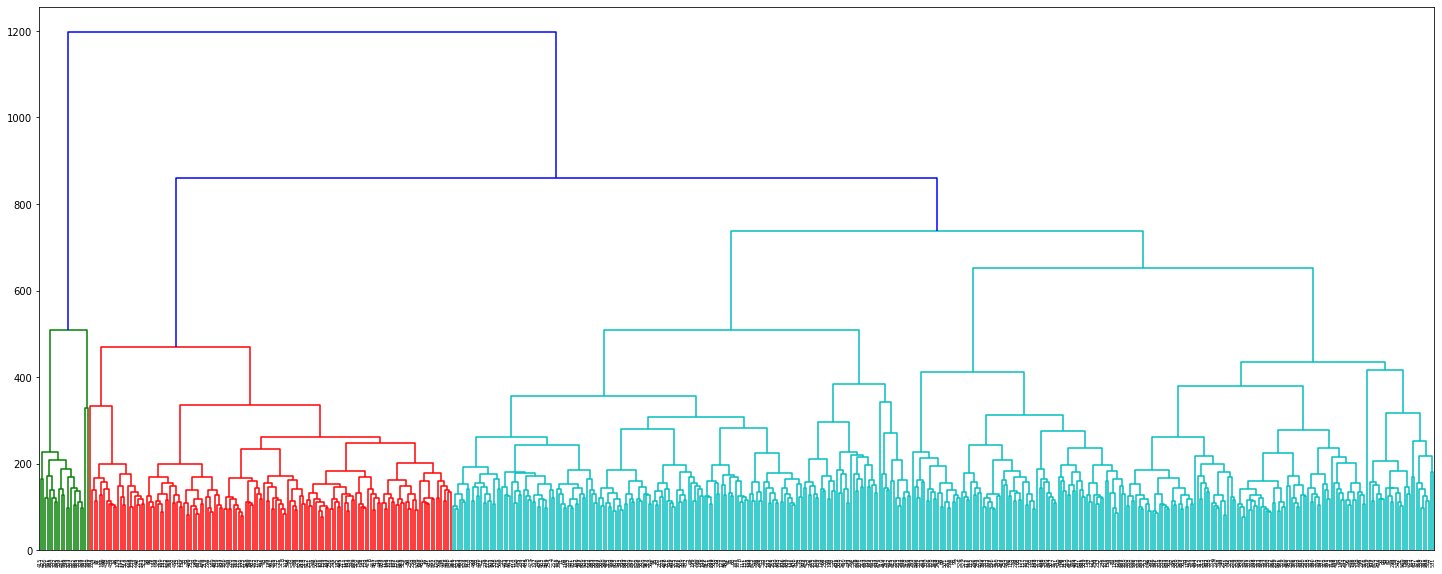

In [78]:
Z = linkage(data_hugo_normalized, method='ward', metric='euclidean')

fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
    

#### K-Means

In [79]:
from sklearn.cluster import KMeans

k=3 #3 clusters based on 3 cancer types (detailed)
kmeans_ctd = KMeans(n_clusters=k, max_iter=1000)
kmeans_ctd.fit(data_hugo_normalized.values)
labels = kmeans_ctd.labels_
centroids = kmeans_ctd.cluster_centers_

pd.crosstab(labels,meta_crc['Cancer Type Detailed'], rownames=['clusters'] )


Cancer Type Detailed,Colon Adenocarcinoma,Mucinous Adenocarcinoma of the Colon and Rectum,Rectal Adenocarcinoma
clusters,,,
0,154,22,58
1,22,2,6
2,201,37,90


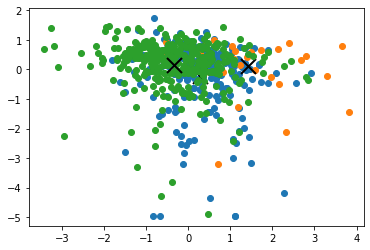

In [80]:
for i in range(k):
    # select only data observations with cluster label == i
    ds = data_hugo_normalized.values[np.where(labels==i)]
    # plot the data observations
    plt.plot(ds[:,0],ds[:,1],'o')
    # plot the centroids
    lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
    # make the centroid x's bigger
    plt.setp(lines,ms=15.0)
    plt.setp(lines,mew=2.0)
plt.show()

#### PCA

[0.15075713 0.09742874 0.06175535 0.04975868 0.03367727 0.02499197
 0.02405151 0.01997109 0.0169143  0.01424155 0.01315036 0.01288298
 0.01208607 0.01069958 0.01035833 0.00977389 0.00952959 0.00904561
 0.00853148 0.00764695 0.00748247 0.00707116 0.00690476 0.00657433
 0.00613178 0.0057492  0.00553545 0.00552182 0.00537645 0.00501364
 0.00493084 0.00476401 0.00469475 0.00437597 0.00432251 0.00429383
 0.00411286 0.00395153 0.003839   0.00373334 0.00368562 0.00358661
 0.00341182 0.00336579 0.00329471 0.00324582 0.00308967 0.00302024
 0.00286396 0.00283119]
0.734027570250856


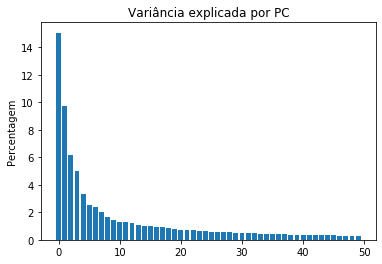

In [81]:
from sklearn.decomposition import PCA
n=50
pca_crc = PCA(n_components=n)
pca_crc.fit(data_hugo_normalized.values)
x_reduced = pca_crc.transform(data_hugo_normalized)


print(pca_crc.explained_variance_ratio_)
print(sum(pca_crc.explained_variance_ratio_))  
plt.bar(range(n), pca_crc.explained_variance_ratio_*100)
#plt.xticks(range(n), ['PC'+str(i) for i in range(1,n+1)])
plt.title("Variância explicada por PC")
plt.ylabel("Percentagem")
plt.show()

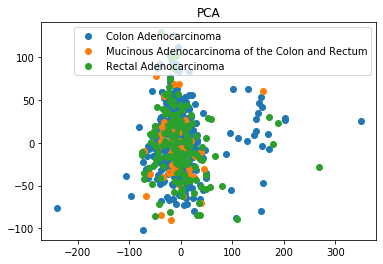

In [82]:
# PC1 and PC2 only (plot)
# first we need to create a numeric index
meta_crc_index = meta_crc.reset_index()

for cancer in meta_crc['Cancer Type Detailed'].unique():
    sp = meta_crc_index.index[meta_crc['Cancer Type Detailed']==cancer]-1
    plt.plot(x_reduced[sp,0],x_reduced[sp,1], 'o' , label=cancer)
plt.title("PCA")
plt.legend(loc='best', shadow=False)
plt.show()

De seguida, procedeu-se de forma a se obter os genes que conseguem descrever de forma mais precisa a variância do dataframe.

In [83]:
#return to features domain
PCnames = []
for i in range(pca_crc.n_components_):
    PCnames.append('PC'+str(i+1)) 

Loadings = pd.DataFrame(pca_crc.components_.transpose(),columns=PCnames,index=data_hugo_normalized.columns)

Loadings.iloc[:,:5].head()

,PC1,PC2,PC3,PC4,PC5
Hugo_Symbol,,,,,
A1BG,0.007088,0.009491,0.013776,0.012983,0.004739
A1CF,0.001202,-0.006203,-0.014094,0.006377,0.013894
A2LD1,0.000548,-0.005672,0.006767,0.001756,0.013678
A2M,-0.003442,0.021201,0.001417,0.010465,0.000878
A4GALT,0.003275,0.018241,0.009263,0.011691,-0.008345


In [84]:
Loadings["PC1"].abs().sort_values(ascending = False).head()

Hugo_Symbol
MATR3      0.019377
DCUN1D1    0.019022
MARCH7     0.018967
PCNP       0.018862
GABPA      0.018842
Name: PC1, dtype: float64

Sendo esses genes os que estão armazenados no array filt_genes.

In [85]:
#filter the genes
filt_genes = []
for i in range(pca_crc.n_components_):
    filt_genes += Loadings.abs().index[Loadings.abs().iloc[:,i] == Loadings.abs().iloc[:,i].max()].tolist()
print(filt_genes)

['MATR3', 'ATP8B2', 'NCOA6', 'FUNDC2', 'PSMC3IP', 'RAB13', 'CHKB-CPT1B', 'DCUN1D2', 'YKT6', 'PHLDA1', 'KRT19', 'APOBEC3F', 'GLUD2', 'BMP4', 'FAM54B', 'GTPBP2', 'FAM120C', 'PGM3', 'UBQLN4', 'ELL3', 'C2', 'EGLN1', 'CAMKK1', 'GLTP', 'CCDC123', 'ARF3', 'RBBP4', 'TRIB3', 'VIPAR', 'ZNF395', 'METT10D', 'CMTM7', 'PI4K2A', 'DDX19A', 'PI3', 'LMAN2L', 'C20orf72', 'KCNJ2', 'C21orf29', 'C10orf75', 'KIAA1908', 'SRXN1', 'RNF34', 'PSMF1', 'NR4A1', 'KCNMA1', 'TLE1', 'HES6', 'KLF10', 'GDPD2']


No entanto, pode-se ver, através do gráfico do PCA, que não conseguimos ter uma boa representação da variância do dataset. Assim, teve-se de se optar por uma nova abordagem. 

Esta abordagem consistiu em ordenar os genes de acordo com a sua variância (descrita de seguida)

In [86]:
df_join3 = df_join2.drop(['Fraction Genome Altered','Diagnosis Age','Aneuploidy Score','Mutation Count','Overall Survival Status','Tumor Type'],axis=1)
index_list = filt_genes + ['Cancer Type Detailed']

df_join3 = df_join3.loc[:,~df_join3.columns.duplicated()] #remove duplicated columns
df_join3 = df_join3.reindex(index_list, axis=1)
display(df_join3.head())


,MATR3,ATP8B2,NCOA6,FUNDC2,PSMC3IP,RAB13,CHKB-CPT1B,DCUN1D2,YKT6,PHLDA1,...,SRXN1,RNF34,PSMF1,NR4A1,KCNMA1,TLE1,HES6,KLF10,GDPD2,Cancer Type Detailed
TCGA-3L-AA1B-01,0.839034,0.746172,0.240096,0.252306,0.857607,0.379541,0.888742,0.337117,0.712317,1.850504,...,0.382727,0.779161,0.957028,-0.340672,0.681263,0.242742,0.736752,-0.706708,-0.944650,Colon Adenocarcinoma
TCGA-4N-A93T-01,-0.728425,-1.466261,0.060612,-0.060799,-0.396623,0.137449,1.580858,1.517893,1.064577,-1.916493,...,0.313612,-0.251431,-0.003064,0.809587,-1.856039,1.594994,-1.087179,-0.527095,1.334794,Colon Adenocarcinoma
TCGA-4T-AA8H-01,-0.587155,-1.663456,-0.973105,-1.310091,-0.271217,-0.415002,1.100945,0.342036,0.012263,-0.215331,...,-1.024094,-0.153743,-0.663318,1.743700,0.635526,0.810956,-0.054471,0.940910,1.312036,Mucinous Adenocarcinoma of the Colon and Rectum
TCGA-5M-AAT4-01,-0.219462,-0.771391,0.240762,0.539361,0.794572,0.367000,0.574212,0.301670,0.898730,-0.595485,...,0.545469,-0.572157,-0.237650,0.499752,-1.234814,-0.160837,-0.003731,-0.445950,0.970418,Colon Adenocarcinoma
TCGA-5M-AAT5-01,0.383297,-1.128033,0.843250,-0.399717,0.966371,-0.512271,0.044188,0.705408,0.352583,0.029208,...,-0.998687,0.033301,-1.738519,2.342090,-1.459347,1.429487,0.723273,1.438390,0.541255,Colon Adenocarcinoma


In [87]:
#create a dataframe with all genes and the label : Cancer Type Detailed; order by standard deviation
df_join3 = df_join2.drop(['Fraction Genome Altered','Diagnosis Age','Aneuploidy Score','Mutation Count','Overall Survival Status','Tumor Type'],axis=1)
df_join3 = df_join3.loc[:,~df_join3.columns.duplicated()] #remove duplicated columns
index_list = data_hugo_t_notna_fpf.std().sort_values(ascending = False).index.tolist()
#select the number of genes sorted by standard deviation
genes_number = 1000
index_list = index_list[0:genes_number]
index_list.append("Cancer Type Detailed")
df_join3_std = df_join3.loc[:,~df_join3.columns.duplicated()] #remove duplicated columns
df_join3_std = df_join3_std.reindex(index_list, axis=1)
display(df_join3_std.head())



,IGF2,COL1A1,OLFM4,CEACAM5,ADAM6,PIGR,COL3A1,ACTB,MUC2,REG1A,...,LAMC1,SC4MOL,UQCRC2,ECH1,MUC6,SOX4,ADD3,MORF4L2,RARA,Cancer Type Detailed
TCGA-3L-AA1B-01,-0.181882,-0.561332,1.056477,-0.096287,0.838778,0.285051,-0.289954,-0.697208,0.609789,-0.034406,...,0.490807,-0.759807,-0.970658,-0.176094,0.758355,1.668595,0.853929,0.100284,0.522351,Colon Adenocarcinoma
TCGA-4N-A93T-01,-0.786736,-1.934773,0.133793,0.644975,0.586740,1.021857,-1.762393,-0.052801,-0.013892,-0.005997,...,-1.985697,-0.866553,-0.039866,0.843039,0.163865,-0.681797,0.250673,-0.956319,1.162650,Colon Adenocarcinoma
TCGA-4T-AA8H-01,-0.616174,-1.796445,-0.142192,0.566982,0.293456,0.738815,-1.717831,0.241611,0.679078,-1.062036,...,-1.058295,-0.703772,-0.298451,0.614298,-0.094681,-1.342044,-0.592590,-0.432852,-0.594039,Mucinous Adenocarcinoma of the Colon and Rectum
TCGA-5M-AAT4-01,-0.585607,-0.631052,-1.420950,0.433223,-0.930864,0.630006,-0.817584,-0.902625,-0.119373,-1.915107,...,-0.225105,0.576150,0.007766,0.183533,0.047869,-0.875359,-0.540151,0.553968,0.196319,Colon Adenocarcinoma
TCGA-5M-AAT5-01,2.380386,-0.845392,0.740308,0.063220,-0.271071,0.701616,-1.032529,0.143880,0.333517,0.698626,...,-0.891194,0.541151,1.261863,0.082062,0.154315,0.637762,-0.644624,-0.322357,0.517598,Colon Adenocarcinoma


O dataframe df_join3_std corresponde ao dataframe com os genes ordenados por desvio padrão.

In [88]:
k=3 #3 clusters based on 3 cancer types (detailed)
kmeans_ctd_f = KMeans(n_clusters=k, max_iter=1000)
kmeans_ctd_f.fit(df_join3.iloc[:,0:pca_crc.n_components_].values)
labels_f = kmeans_ctd_f.labels_
centroids_f = kmeans_ctd_f.cluster_centers_

pd.crosstab(labels_f,meta_crc['Cancer Type Detailed'], rownames=['clusters'] )

Cancer Type Detailed,Colon Adenocarcinoma,Mucinous Adenocarcinoma of the Colon and Rectum,Rectal Adenocarcinoma
clusters,,,
0,194,27,82
1,161,32,67
2,22,2,5


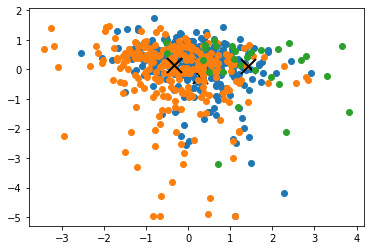

In [89]:
for i in range(k):
    # select only data observations with cluster label == i
    ds = df_join3.values[np.where(labels_f==i)]
    # plot the data observations
    plt.plot(ds[:,0],ds[:,1],'o')
    # plot the centroids
    lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
    # make the centroid x's bigger
    plt.setp(lines,ms=15.0)
    plt.setp(lines,mew=2.0)
plt.show()

0.8013270390505925


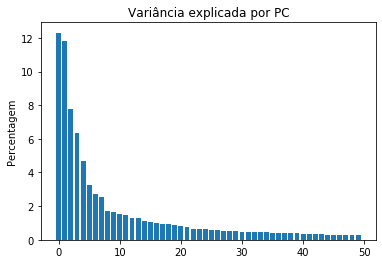

In [90]:
n=50
pca_crc_std = PCA(n_components=n)
pca_crc_std.fit(df_join3_std.iloc[:,0:1000].values)
x_reduced_std = pca_crc_std.transform(df_join3_std.iloc[:,0:1000])


#print(pca_crc_std.explained_variance_ratio_)
print(sum(pca_crc_std.explained_variance_ratio_))  
plt.bar(range(n), pca_crc_std.explained_variance_ratio_*100)
#plt.xticks(range(n), ['PC'+str(i) for i in range(1,n+1)])
plt.title("Variância explicada por PC")
plt.ylabel("Percentagem")
plt.show()

In [91]:
k=3 #3 clusters based on 3 cancer types (detailed)
kmeans_ctd_std = KMeans(n_clusters=k, max_iter=1000)
kmeans_ctd_std.fit(df_join3_std.iloc[:,0:pca_crc_std.n_components_].values)
labels_std = kmeans_ctd_std.labels_
centroids_std = kmeans_ctd_std.cluster_centers_

pd.crosstab(labels_std,meta_crc['Cancer Type Detailed'], rownames=['clusters'] )

Cancer Type Detailed,Colon Adenocarcinoma,Mucinous Adenocarcinoma of the Colon and Rectum,Rectal Adenocarcinoma
clusters,,,
0,113,17,40
1,138,23,67
2,126,21,47


A partir da tabela e gráfico anteriores, pode-se ver que a identificação dos diferentes clusters continua a ser uma tarefa complicada. 

Verificando, de seguida, os resultados do PCA para o grupo de genes resultantes do teste ANOVA:

0.9435707718368332


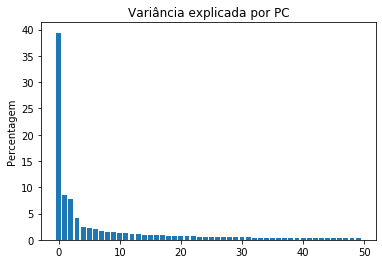

In [92]:
n=50
pca_crc_new1 = PCA(n_components=n)
pca_crc_new1.fit(df_new1_features)
x_reduced_new1 = pca_crc_new1.transform(df_new1_features)


#print(pca_crc_std.explained_variance_ratio_)
print(sum(pca_crc_new1.explained_variance_ratio_))  
plt.bar(range(n), pca_crc_new1.explained_variance_ratio_*100)
#plt.xticks(range(n), ['PC'+str(i) for i in range(1,n+1)])
plt.title("Variância explicada por PC")
plt.ylabel("Percentagem")
plt.show()

Pode-se ver que este grupo de genes consegue descrever de uma forma mais precisa a variância do dataframe. Assim, os resultados do clustering serão melhores do que os anteriores.

In [94]:
k=3 #3 clusters based on 3 cancer types (detailed)
kmeans_ctd_new1 = KMeans(n_clusters=k)
kmeans_ctd_new1.fit(df_new1_features)
labels_new1 = kmeans_ctd_new1.labels_
centroids_new1 = kmeans_ctd_new1.cluster_centers_

pd.crosstab(labels_new1,df_new1['Cancer Type Detailed'], rownames=['clusters'] )

Cancer Type Detailed,Colon Adenocarcinoma,Mucinous Adenocarcinoma of the Colon and Rectum,Rectal Adenocarcinoma
clusters,,,
0,141,0,74
1,160,18,64
2,76,43,16


E de facto, pode se ver que exite uma melhor definição dos clusters comparativamente com os anteriores.
(é possível verificar que nenhum indivíduo com adenocarcinoma mucinoso pertence ao cluster 0...)

Testando, por fim, o k-means e o PCA para o dataframe que resulta do conjunto de genes que diferencia os indivíduos com adenocarcinoma do cólon e do reto, e dos genes que diferenciam de uma forma geral os indivíduos dos três tipos de cancro.

0.9846334829913459


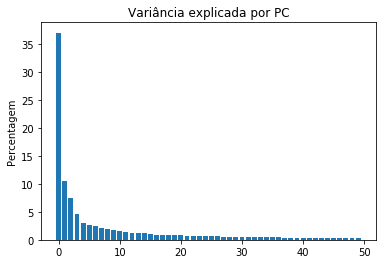

In [184]:
n=50
pca_crc_new1_join = PCA(n_components=n)
pca_crc_new1_join.fit(df_new1_join_features)
x_reduced_new1_join = pca_crc_new1_join.transform(df_new1_join_features)


#print(pca_crc_std.explained_variance_ratio_)
print(sum(pca_crc_new1_join.explained_variance_ratio_))  
plt.bar(range(n), pca_crc_new1_join.explained_variance_ratio_*100)
#plt.xticks(range(n), ['PC'+str(i) for i in range(1,n+1)])
plt.title("Variância explicada por PC")
plt.ylabel("Percentagem")
plt.show()

In [186]:
k=3 #3 clusters based on 3 cancer types (detailed)
kmeans_ctd_new1_join = KMeans(n_clusters=k)
kmeans_ctd_new1_join.fit(df_new1_join_features)
labels_new1_join = kmeans_ctd_new1_join.labels_
centroids_new1_join = kmeans_ctd_new1_join.cluster_centers_

pd.crosstab(labels_new1_join,df_new1_join['Cancer Type Detailed'], rownames=['clusters'] )

Cancer Type Detailed,Colon Adenocarcinoma,Mucinous Adenocarcinoma of the Colon and Rectum,Rectal Adenocarcinoma
clusters,,,
0,155,17,59
1,54,43,17
2,168,1,78


Apesar da seleção do conjunto de genes mais capaz de diferenciar estes tipos de cancro, continua-se a ter definição não tão boa entre indivíduos com adenocarcinoma do cólon e adenocarcinoma do reto.

## Secção 3

### Supervised Learning

Primeiramente, recorreu-se ao dataframe df_new1...

In [95]:
from sklearn.neighbors import KNeighborsClassifier

In [96]:
labels = meta_crc['Cancer Type Detailed'].values

#df_features = df_new1.iloc[:,0:pca_crc_std.n_components_]
df_features = df_new1_features
#create a division in dataframe -> train data and test data
num_samples = len(df_features)
len_traindata = int(2/3*num_samples)
len_testdata = num_samples-len_traindata

#randomize the training and test data selection process
indices = np.random.permutation(num_samples)

train_features = df_features.iloc[indices[:len_traindata]]
train_labels = labels[indices[:len_traindata]]

test_features = df_features.iloc[indices[len_traindata:]]
test_labels = labels[indices[len_traindata:]]

##### Tree Classifier

In [97]:
from sklearn import tree

tree_model = tree.DecisionTreeClassifier()
tree_model = tree_model.fit(train_features, train_labels)
print(tree_model)

print("Tree model Result: ", tree_model.predict(test_features))
print("Real Labels: ", test_labels)


foressen=tree_model.predict(test_features)
real=test_labels

sum_var=0
for i in range (0,len(foressen)):
    if foressen[i]==real[i]:
        sum_var=sum_var+1 #incrementa 1 sempre que o elemento i da lista previsto é igual ao elemento i da lista real
percentage=sum_var/len(foressen)*100

print('Score:',percentage ,'%')
print(tree_model.score(test_features, test_labels))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
Tree model Result:  ['Colon Adenocarcinoma' 'Rectal Adenocarcinoma' 'Rectal Adenocarcinoma'
 'Colon Adenocarcinoma' 'Colon Adenocarcinoma' 'Rectal Adenocarcinoma'
 'Colon Adenocarcinoma' 'Colon Adenocarcinoma' 'Rectal Adenocarcinoma'
 'Rectal Adenocarcinoma' 'Colon Adenocarcinoma' 'Colon Adenocarcinoma'
 'Rectal Adenocarcinoma' 'Colon Adenocarcinoma'
 'Mucinous Adenocarcinoma of the Colon and Rectum'
 'Mucinous Adenocarcinoma of the Colon and Rectum' 'Colon Adenocarcinoma'
 'Colon Adenocarcinoma' 'Colon Adenocarcinoma' 'Colon Adenocarcinoma'
 'Rectal Adenocarcinoma' 'Colon Adenocarcinoma'

##### SVM

In [98]:
from sklearn import svm

clf = svm.SVC(gamma=0.1, C=20)
svm_model = clf.fit(train_features, train_labels)
print(svm_model)

print('SVM results:',clf.predict(test_features))
print('Real Labels:',test_labels)

print('Score:',svm_model.score(test_features, test_labels)) 


SVC(C=20, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
SVM results: ['Colon Adenocarcinoma' 'Colon Adenocarcinoma' 'Colon Adenocarcinoma'
 'Colon Adenocarcinoma' 'Colon Adenocarcinoma' 'Colon Adenocarcinoma'
 'Colon Adenocarcinoma' 'Colon Adenocarcinoma' 'Colon Adenocarcinoma'
 'Colon Adenocarcinoma' 'Colon Adenocarcinoma' 'Colon Adenocarcinoma'
 'Colon Adenocarcinoma' 'Colon Adenocarcinoma' 'Colon Adenocarcinoma'
 'Colon Adenocarcinoma' 'Colon Adenocarcinoma' 'Colon Adenocarcinoma'
 'Colon Adenocarcinoma' 'Colon Adenocarcinoma' 'Colon Adenocarcinoma'
 'Colon Adenocarcinoma' 'Colon Adenocarcinoma' 'Colon Adenocarcinoma'
 'Colon Adenocarcinoma' 'Colon Adenocarcinoma' 'Colon Adenocarcinoma'
 'Colon Adenocarcinoma' 'Colon Adenocarcinoma' 'Colon Adenocarcinoma'
 'Colon Adenocarcinoma' 'Colon Adenocarcinoma' 'Colon Adenoc

##### Gradient Boosting Classifier

In [99]:
from sklearn.ensemble import GradientBoostingClassifier

lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=3, max_depth=3, random_state=0)
    gb_clf.fit(train_features, train_labels)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(train_features, train_labels)))
    print("Accuracy score (testing): {0:.3f}".format(gb_clf.score(test_features, test_labels)))

Learning rate:  0.05
Accuracy score (training): 0.642
Accuracy score (testing): 0.657
Learning rate:  0.075
Accuracy score (training): 0.678
Accuracy score (testing): 0.657
Learning rate:  0.1
Accuracy score (training): 0.718
Accuracy score (testing): 0.641
Learning rate:  0.25
Accuracy score (training): 0.909
Accuracy score (testing): 0.601
Learning rate:  0.5
Accuracy score (training): 0.990
Accuracy score (testing): 0.591
Learning rate:  0.75
Accuracy score (training): 0.997
Accuracy score (testing): 0.535
Learning rate:  1
Accuracy score (training): 1.000
Accuracy score (testing): 0.515


##### Linear Regression

In [100]:
#Modelo regressao linear

from sklearn import linear_model

logistic = linear_model.LogisticRegression(C=0.01, solver = "liblinear")
logistic = logistic.fit(train_features, train_labels)
print(logistic)

print("Logistic Regression Results:" , logistic.predict(test_features))
print("Real Labels" , test_labels)

print(logistic.score(test_features, test_labels))

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
Logistic Regression Results: ['Colon Adenocarcinoma' 'Colon Adenocarcinoma' 'Colon Adenocarcinoma'
 'Colon Adenocarcinoma' 'Colon Adenocarcinoma' 'Colon Adenocarcinoma'
 'Colon Adenocarcinoma' 'Colon Adenocarcinoma' 'Colon Adenocarcinoma'
 'Colon Adenocarcinoma' 'Colon Adenocarcinoma' 'Colon Adenocarcinoma'
 'Rectal Adenocarcinoma' 'Colon Adenocarcinoma' 'Colon Adenocarcinoma'
 'Colon Adenocarcinoma' 'Colon Adenocarcinoma' 'Rectal Adenocarcinoma'
 'Colon Adenocarcinoma' 'Colon Adenocarcinoma' 'Colon Adenocarcinoma'
 'Colon Adenocarcinoma' 'Colon Adenocarcinoma' 'Colon Adenocarcinoma'
 'Colon Adenocarcinoma' 'Colon Adenocarcinoma' 'Colon Adenocarcinoma'
 'Colon 

c:\Users\Utilizador\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [101]:
from sklearn.model_selection import cross_val_score

#svm
scores = cross_val_score(svm_model, df_new1_features, df_new1['Cancer Type Detailed'] , cv = 5)
print("svm:", scores)
print("svm:", scores.mean())

#gb
scores = cross_val_score(gb_clf,df_new1_features, df_new1['Cancer Type Detailed'] , cv = 5)
print("gb_model:", scores)
print("gb_model:", scores.mean())

#linar regression
scores = cross_val_score(logistic, df_new1_features, df_new1['Cancer Type Detailed'], cv = 5)
print("logistic_model:", scores)
print("logistic_model:", scores.mean())

svm: [0.63333333 0.63865546 0.63559322 0.63559322 0.63247863]
svm: 0.6351307737349612
gb_model: [0.68333333 0.62184874 0.61864407 0.6440678  0.70940171]
gb_model: 0.6554591293275241
logistic_model: [0.70833333 0.61344538 0.61864407 0.66949153 0.66666667]
logistic_model: 0.65531619427432


c:\Users\Utilizador\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\Users\Utilizador\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\Users\Utilizador\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\Users\Utilizador\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\Users\Utiliza

Por fim, recorreu-se ao dataframe df_new1_join

In [188]:
labels = meta_crc['Cancer Type Detailed'].values

#df_features = df_new1.iloc[:,0:pca_crc_std.n_components_]
df_join_features = df_new1_join_features
#create a division in dataframe -> train data and test data
num_join_samples = len(df_join_features)
len_join_traindata = int(2/3*num_join_samples)
len_join_testdata = num_join_samples-len_join_traindata

#randomize the training and test data selection process
indices_join = np.random.permutation(num_join_samples)

train_join_features = df_join_features.iloc[indices_join[:len_join_traindata]]
train_join_labels = labels[indices_join[:len_join_traindata]]

test_join_features = df_join_features.iloc[indices_join[len_join_traindata:]]
test_join_labels = labels[indices[len_join_traindata:]]

#### Gradient Boosting

In [191]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=3, max_depth=3, random_state=0)
    gb_clf.fit(train_join_features, train_join_labels)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(train_join_features, train_join_labels)))
    print("Accuracy score (testing): {0:.3f}".format(gb_clf.score(test_join_features, test_join_labels)))

Learning rate:  0.05
Accuracy score (training): 0.670
Accuracy score (testing): 0.657
Learning rate:  0.075
Accuracy score (training): 0.680
Accuracy score (testing): 0.657
Learning rate:  0.1
Accuracy score (training): 0.708
Accuracy score (testing): 0.657
Learning rate:  0.25
Accuracy score (training): 0.878
Accuracy score (testing): 0.631
Learning rate:  0.5
Accuracy score (training): 0.987
Accuracy score (testing): 0.576
Learning rate:  0.75
Accuracy score (training): 1.000
Accuracy score (testing): 0.561
Learning rate:  1
Accuracy score (training): 1.000
Accuracy score (testing): 0.525


In [194]:
#gb
scores = cross_val_score(gb_clf,df_new1_join_features, df_new1_join['Cancer Type Detailed'] , cv = 5)
print("gb_model:", scores)
print("gb_model:", scores.mean())

gb_model: [0.69166667 0.57983193 0.55932203 0.65254237 0.69230769]
gb_model: 0.6351341397054258


Com base no cross validation dos métodos utilizados, podemos constatar, de facto, que os resultados são melhores para o Gradient Boosting. Esta accuracy era a esperada, visto que a identificação de clusters não ficou muito bem definida, principalmente no concerne na distinção entre o adenocarcinoma do cólon e o adenocarcinoma do reto. 

Uma dos aspetos que poderia ter sido abordado era a correção dos problemas de desbalanceamento do dataset.
Um fator que pode ser relevante para os resultados obtidos é o de não existir muita diferença entre o adenocarcinoma do cólon e o adenocarcinoma do reto, no que diz respeito à expressão genética dos genes presentes neste dataset.

Por fim, com este trabalho conseguiu-se identificar o conjunto de genes responsáveis por caraterizar cada tipo de cancro. Foram identificados os genes SPDEF e CKAP4 como diferenciadores dos indivíduos com adenocarcinoma do cólon e o adenocarcinoma mucinoso. Já entre o adenocarcinoma do cólon e do reto foi identificado o gene HOXB13. Entre o adenocarcinoma do reto e o adenocarcinoma mucinoso foram identificados os genes KIAA0406 e UQCC. Além destes genes, também foram encontrados mais, mas estes apresentam um papel mais importante na distinção entre os cancros referidos anteriormente.